# OBESITY LEVELS PREDICTION USING MACHINE LEARNING AND DEEP LEARNING METHODS


In [ ]:
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# IMPORTING NECESSARY LIBRARIES AND MODELS

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, pairwise_distances
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from scipy.stats import uniform, randint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#DATASET EXPLORATION AND VISUALISATION

In [ ]:
#total samples of the dataset => 34597
train=pd.read_csv("/content/train.csv") #20757
test=pd.read_csv("/content/test.csv")   #13840

In [ ]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
train_data = pd.read_csv('/content/train.csv')
print("Training data columns:", train_data.columns.tolist())

Training data columns: ['id', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [ ]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
train=train.drop_duplicates()

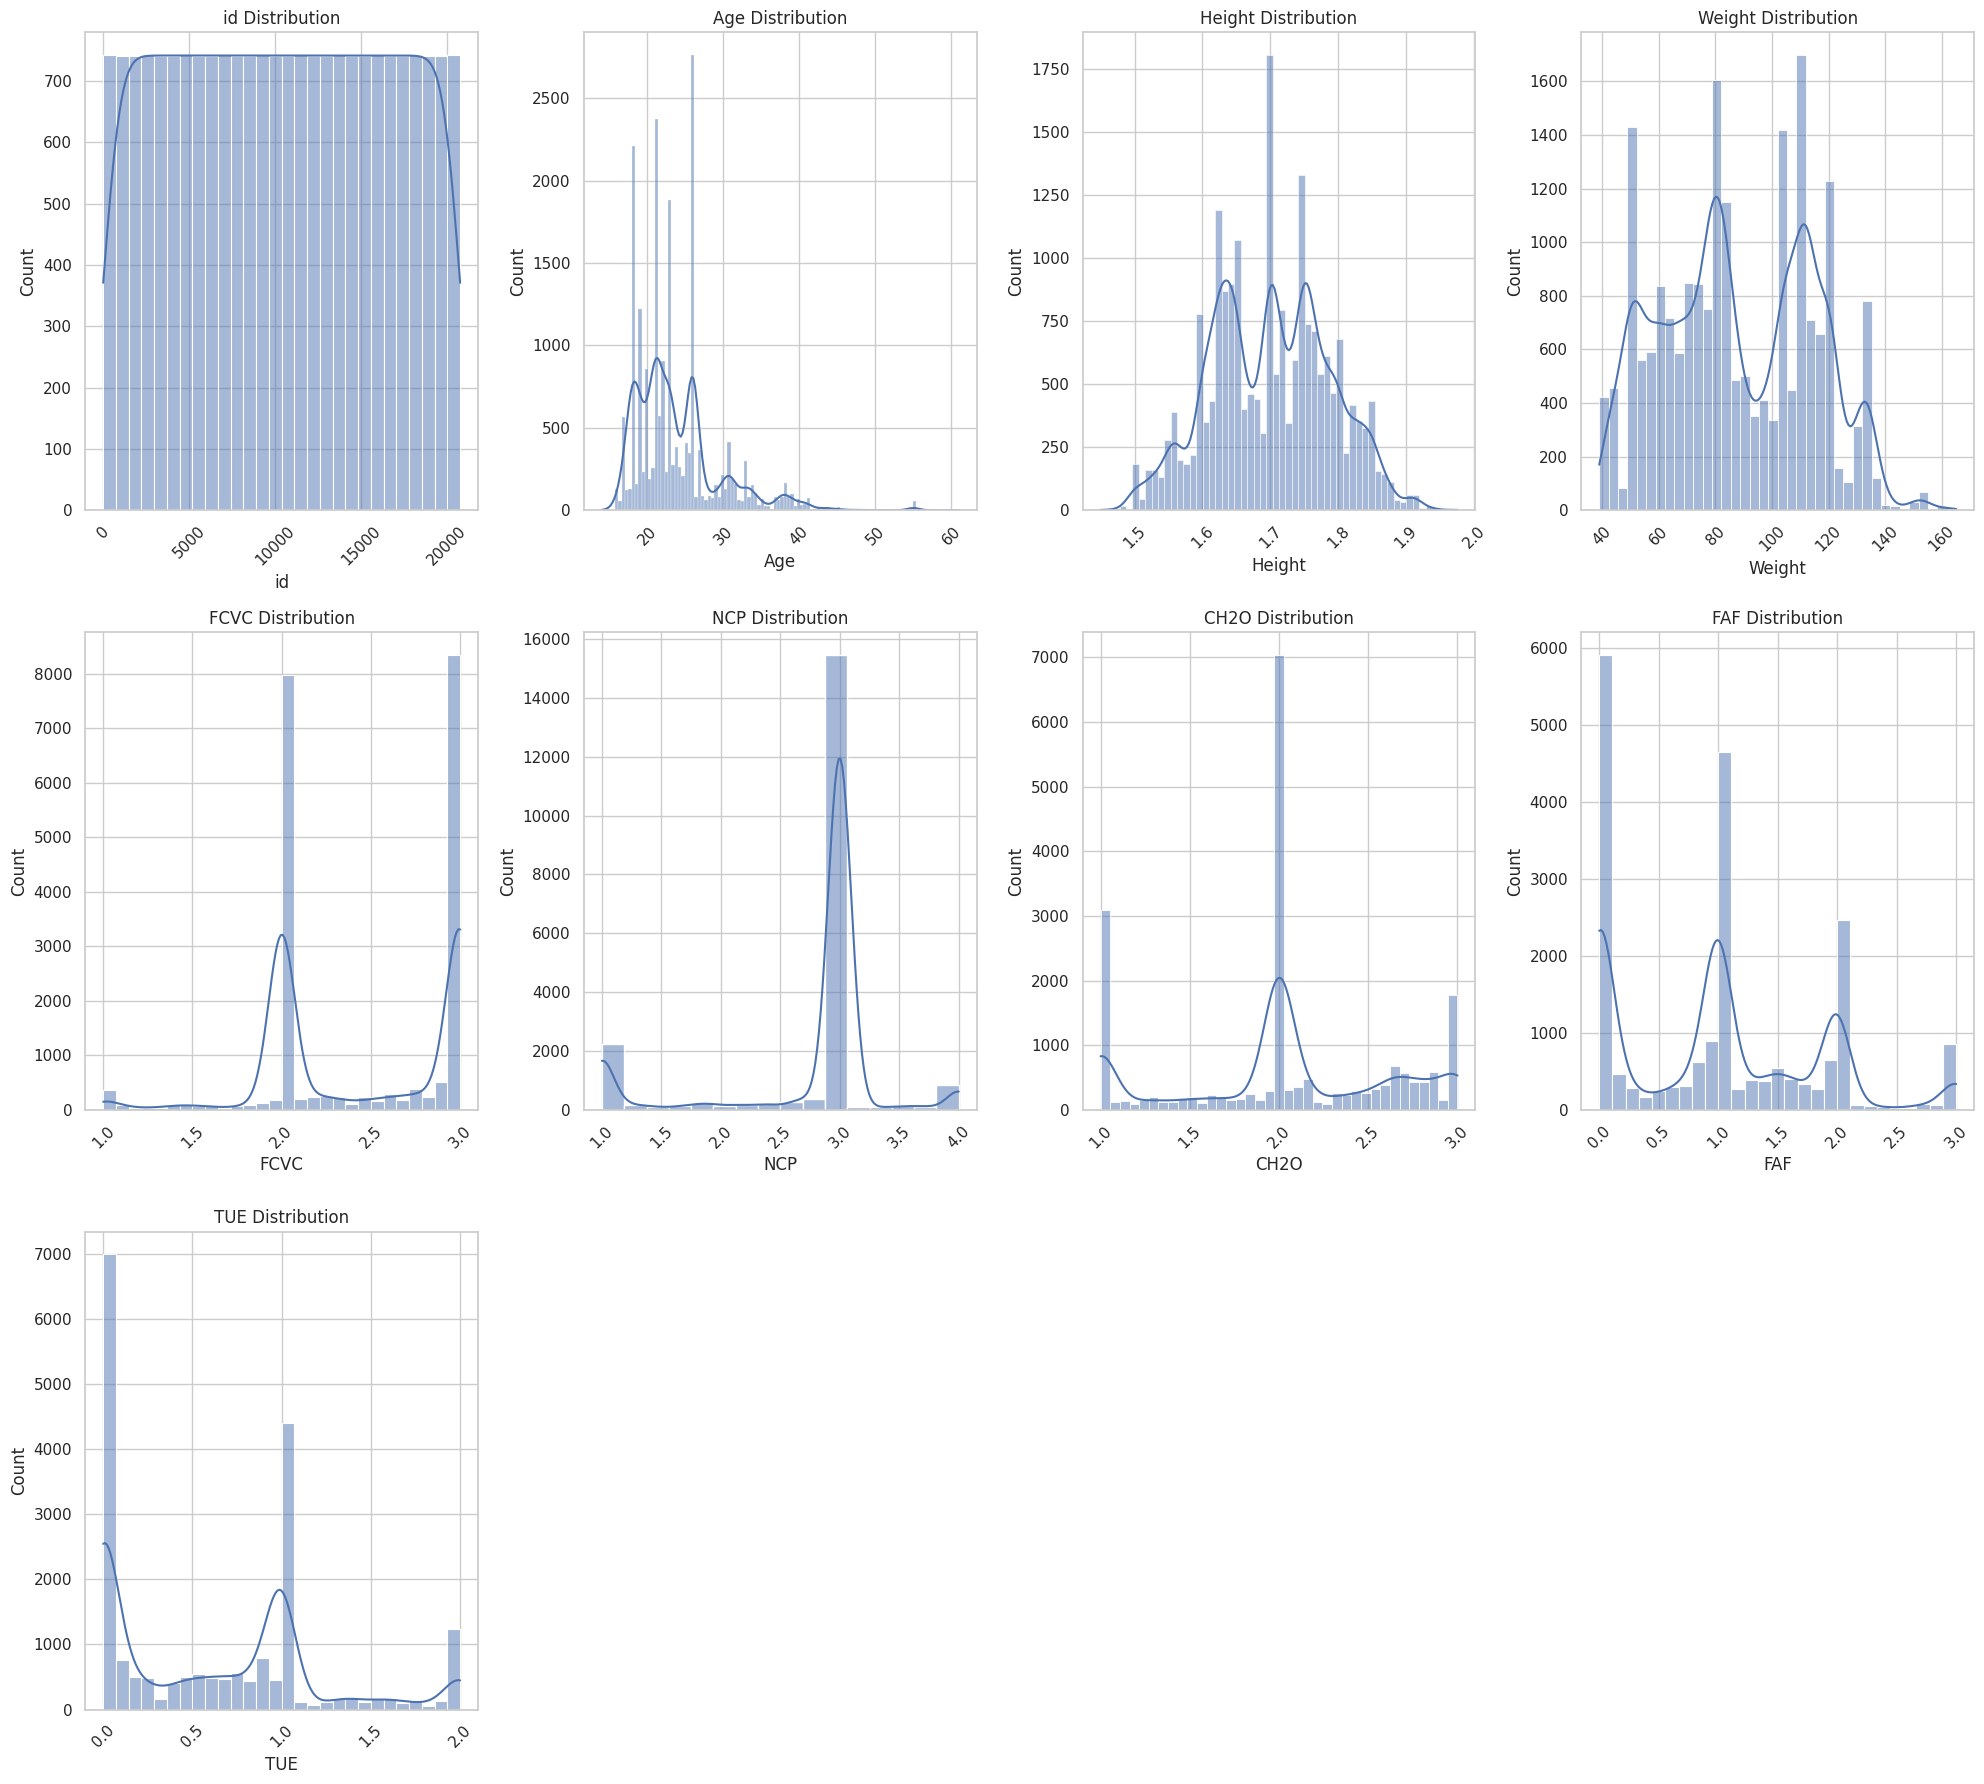

In [ ]:
#numerical data visualisation
sns.set(style="whitegrid")
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(train[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Univariate Analysis - Categorical Variables (Countplots)

<ipython-input-15-efd6d1be5a8a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=train, palette='Set2', ax=axs[0, 0])
<ipython-input-15-efd6d1be5a8a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='family_history_with_overweight', data=train, palette='Set2', ax=axs[0, 1])
<ipython-input-15-efd6d1be5a8a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FAVC', data=train, palette='Set2', ax=axs[0, 2])
<ipython-input-15-efd6d1be5a8a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

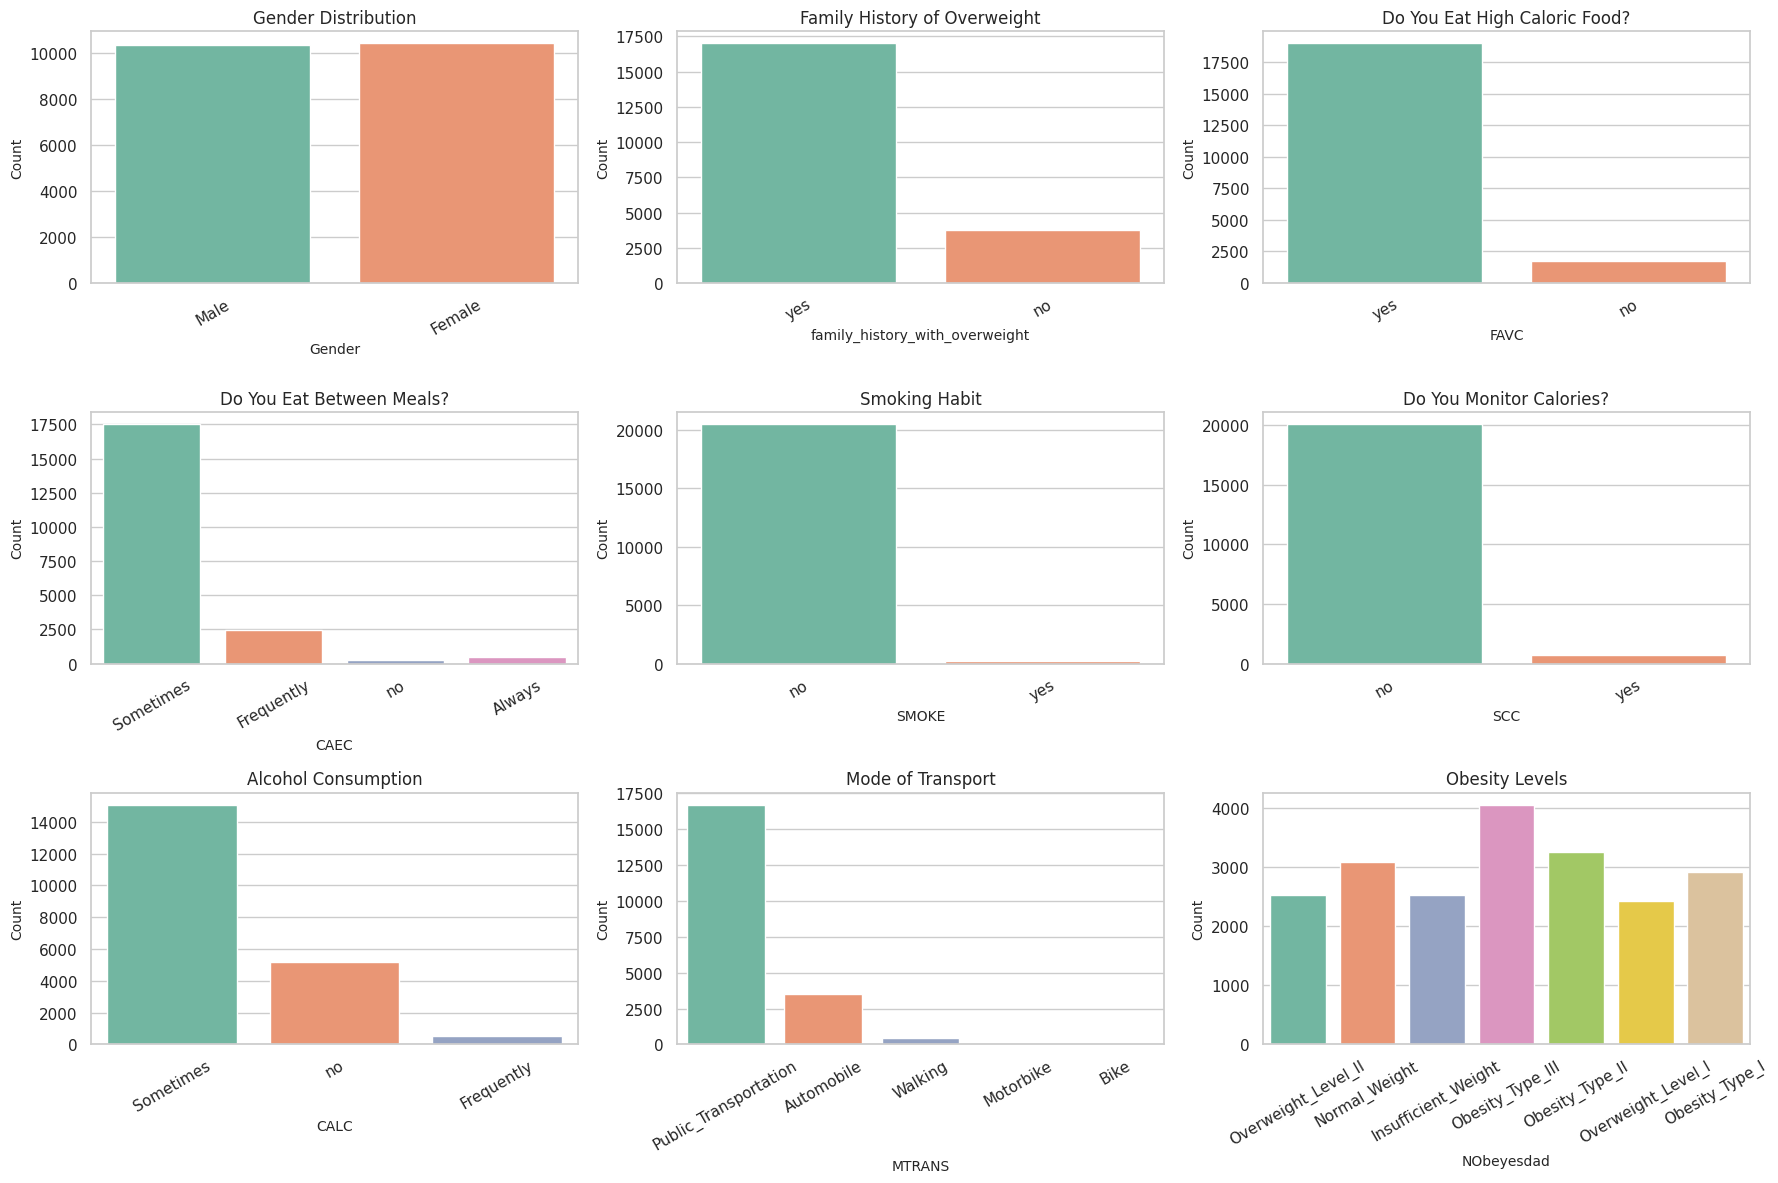

In [ ]:
#categorical data visualisation

train = pd.read_csv('/content/train.csv')
sns.set(style="whitegrid")

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Plotting each categorical variable with countplot
sns.countplot(x='Gender', data=train, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Gender Distribution')

sns.countplot(x='family_history_with_overweight', data=train, palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Family History of Overweight')

sns.countplot(x='FAVC', data=train, palette='Set2', ax=axs[0, 2])
axs[0, 2].set_title('Do You Eat High Caloric Food?')

sns.countplot(x='CAEC', data=train, palette='Set2', ax=axs[1, 0])
axs[1, 0].set_title('Do You Eat Between Meals?')

sns.countplot(x='SMOKE', data=train, palette='Set2', ax=axs[1, 1])
axs[1, 1].set_title('Smoking Habit')

sns.countplot(x='SCC', data=train, palette='Set2', ax=axs[1, 2])
axs[1, 2].set_title('Do You Monitor Calories?')

sns.countplot(x='CALC', data=train, palette='Set2', ax=axs[2, 0])
axs[2, 0].set_title('Alcohol Consumption')

sns.countplot(x='MTRANS', data=train, palette='Set2', ax=axs[2, 1])
axs[2, 1].set_title('Mode of Transport')

sns.countplot(x='NObeyesdad', data=train, palette='Set2', ax=axs[2, 2])
axs[2, 2].set_title('Obesity Levels')

for ax in axs.flat:
    ax.tick_params(axis='x', rotation=30)
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


# Bivariate Analysis - Obesity Levels vs. Continuous Variables (Boxplots)

<ipython-input-16-af8d1a3a3ea3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Age', data=train, palette='Set3', ax=axs[0])
<ipython-input-16-af8d1a3a3ea3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Weight', data=train, palette='Set2', ax=axs[1])
<ipython-input-16-af8d1a3a3ea3>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Height', data=train, palette='Set1', ax=axs[2])


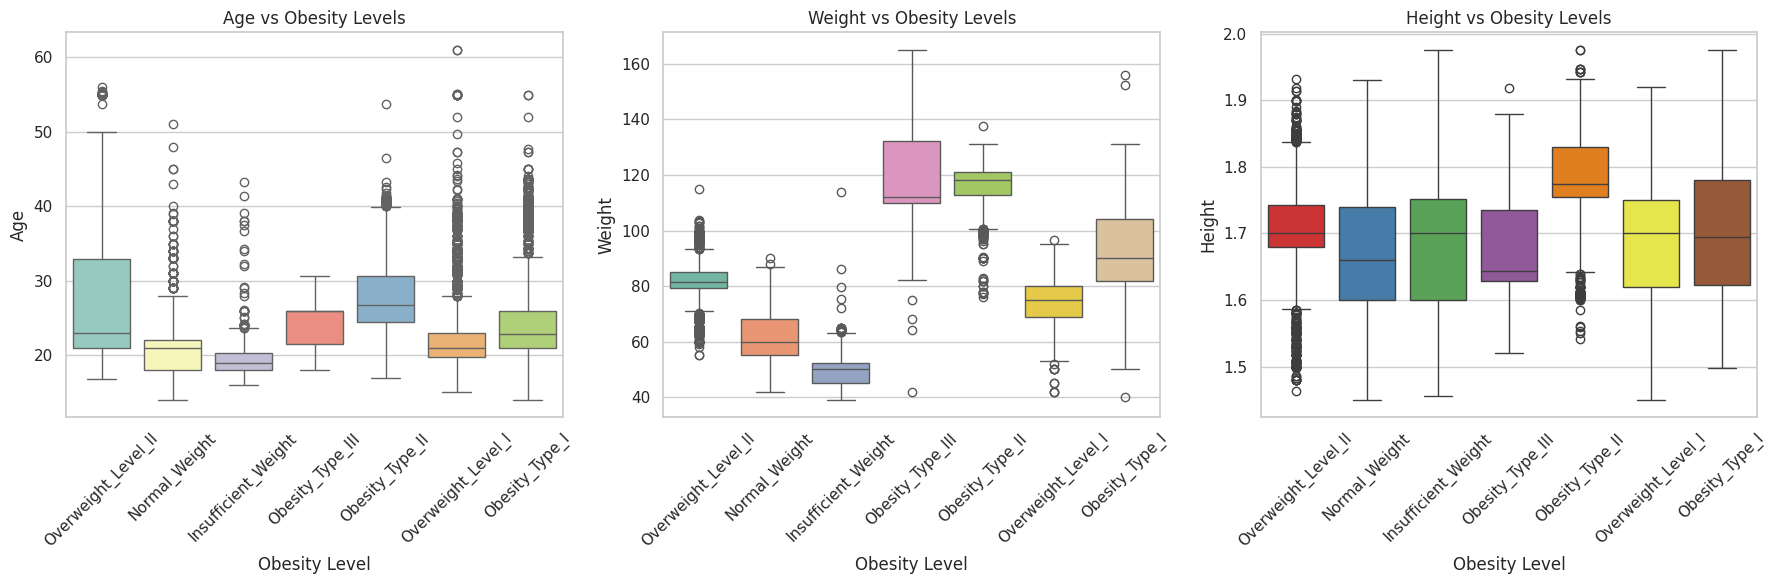

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Age vs. Obesity Level
sns.boxplot(x='NObeyesdad', y='Age', data=train, palette='Set3', ax=axs[0])
axs[0].set_title('Age vs Obesity Levels')
axs[0].set_xlabel('Obesity Level')
axs[0].set_ylabel('Age')
axs[0].tick_params(axis='x', rotation=45)

# Weight vs. Obesity Level
sns.boxplot(x='NObeyesdad', y='Weight', data=train, palette='Set2', ax=axs[1])
axs[1].set_title('Weight vs Obesity Levels')
axs[1].set_xlabel('Obesity Level')
axs[1].set_ylabel('Weight')
axs[1].tick_params(axis='x', rotation=45)

# Height vs. Obesity Level
sns.boxplot(x='NObeyesdad', y='Height', data=train, palette='Set1', ax=axs[2])
axs[2].set_title('Height vs Obesity Levels')
axs[2].set_xlabel('Obesity Level')
axs[2].set_ylabel('Height')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Correlation Analysis - Heatmap for Continuous Variables

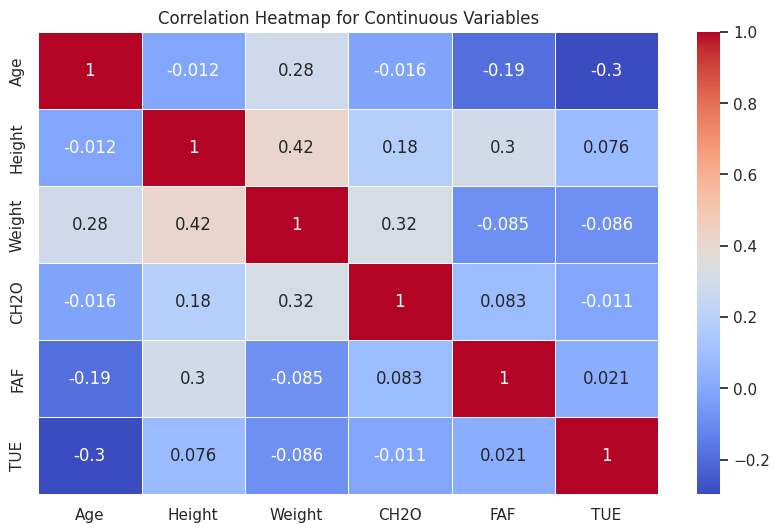

In [ ]:
plt.figure(figsize=(10, 6))
corr = train[['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Continuous Variables')
plt.show()

# DATA PRE-PROCESSING

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample binary mappings
binary_mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'family_history_with_overweight': {'no': 0, 'yes': 1},
    'FAVC': {'no': 0, 'yes': 1},
    'SMOKE': {'no': 0, 'yes': 1},
    'SCC': {'no': 0, 'yes': 1}
}

# Apply binary mappings to train and test datasets
for column, mapping in binary_mappings.items():
    train[column] = train[column].map(mapping)
    test[column] = test[column].map(mapping)

# Multi-valued categorical columns
multi_valued_columns = ['CAEC', 'CALC', 'MTRANS']

# Combine train and test datasets for label encoding
combined_data = pd.concat([train[multi_valued_columns], test[multi_valued_columns]], keys=['train', 'test'])

# Encode each column separately to avoid reusing the same LabelEncoder instance
for column in multi_valued_columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column].astype(str))

# Split back the combined data into train and test
train[multi_valued_columns] = combined_data.xs('train')
test[multi_valued_columns] = combined_data.xs('test')

# Encode the target variable with a separate LabelEncoder
target_le = LabelEncoder()
train['NObeyesdad'] = target_le.fit_transform(train['NObeyesdad'].astype(str))

# Output the processed data for verification
print("Train Data:")
print(train.head())
print("\nTest Data:")
print(test.head())


Train Data:
   id  Gender        Age    Height      Weight  \
0   0       0  24.443011  1.699998   81.669950   
1   1       1  18.000000  1.560000   57.000000   
2   2       1  18.000000  1.711460   50.165754   
3   3       1  20.952737  1.710730  131.274851   
4   4       0  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     2      0   
1                               1     1  2.000000  3.000000     1      0   
2                               1     1  1.880534  1.411685     2      0   
3                               1     1  3.000000  3.000000     2      0   
4                               1     1  2.679664  1.971472     2      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0  2.763573    0  0.000000  0.976473     2       3           6  
1  2.000000    0  1.000000  1.000000     3       0           1  
2  1.910378    0  0.866045  1.67358

In [ ]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import joblib

# Drop constant features if any
constant_features = train.loc[:, train.nunique() <= 1].columns
train = train.drop(columns=constant_features)

# Prepare feature columns
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

# Columns to scale
columns_to_scale = ['Height', 'Weight', 'FCVC', 'Gender']
columns_to_scale = [col for col in columns_to_scale if col in X.columns]

# Power Transformer to normalize only selected features
pt = PowerTransformer(method='yeo-johnson')
X_scaled_part = pt.fit_transform(X[columns_to_scale])

# Save the PowerTransformer for later use
joblib.dump(pt, 'scaler.pkl')

# Combine scaled features with unscaled features
X[columns_to_scale] = X_scaled_part
train_scaled = pd.concat([X, y], axis=1)

print("Scaled Train Data (with selected features scaled):")
print(train_scaled.head())


Scaled Train Data (with selected features scaled):
   id    Gender        Age    Height    Weight  \
0   0 -1.004152  24.443011  0.001826 -0.180944   
1   1  0.995866  18.000000 -1.613755 -1.189908   
2   2  0.995866  18.000000  0.133016 -1.495630   
3   3  0.995866  20.952737  0.124665  1.562234   
4   4 -1.004152  31.641081  2.427755  0.274031   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1 -0.882621  2.983297     2      0   
1                               1     1 -0.882621  3.000000     1      0   
2                               1     1 -1.077494  1.411685     2      0   
3                               1     1  1.072753  3.000000     2      0   
4                               1     1  0.383134  1.971472     2      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad  
0  2.763573    0  0.000000  0.976473     2       3           6  
1  2.000000    0  1.000000  1.000000     3       0           

In [ ]:
joblib.dump(pt, 'scaled_final.pkl')

['scaled_final.pkl']

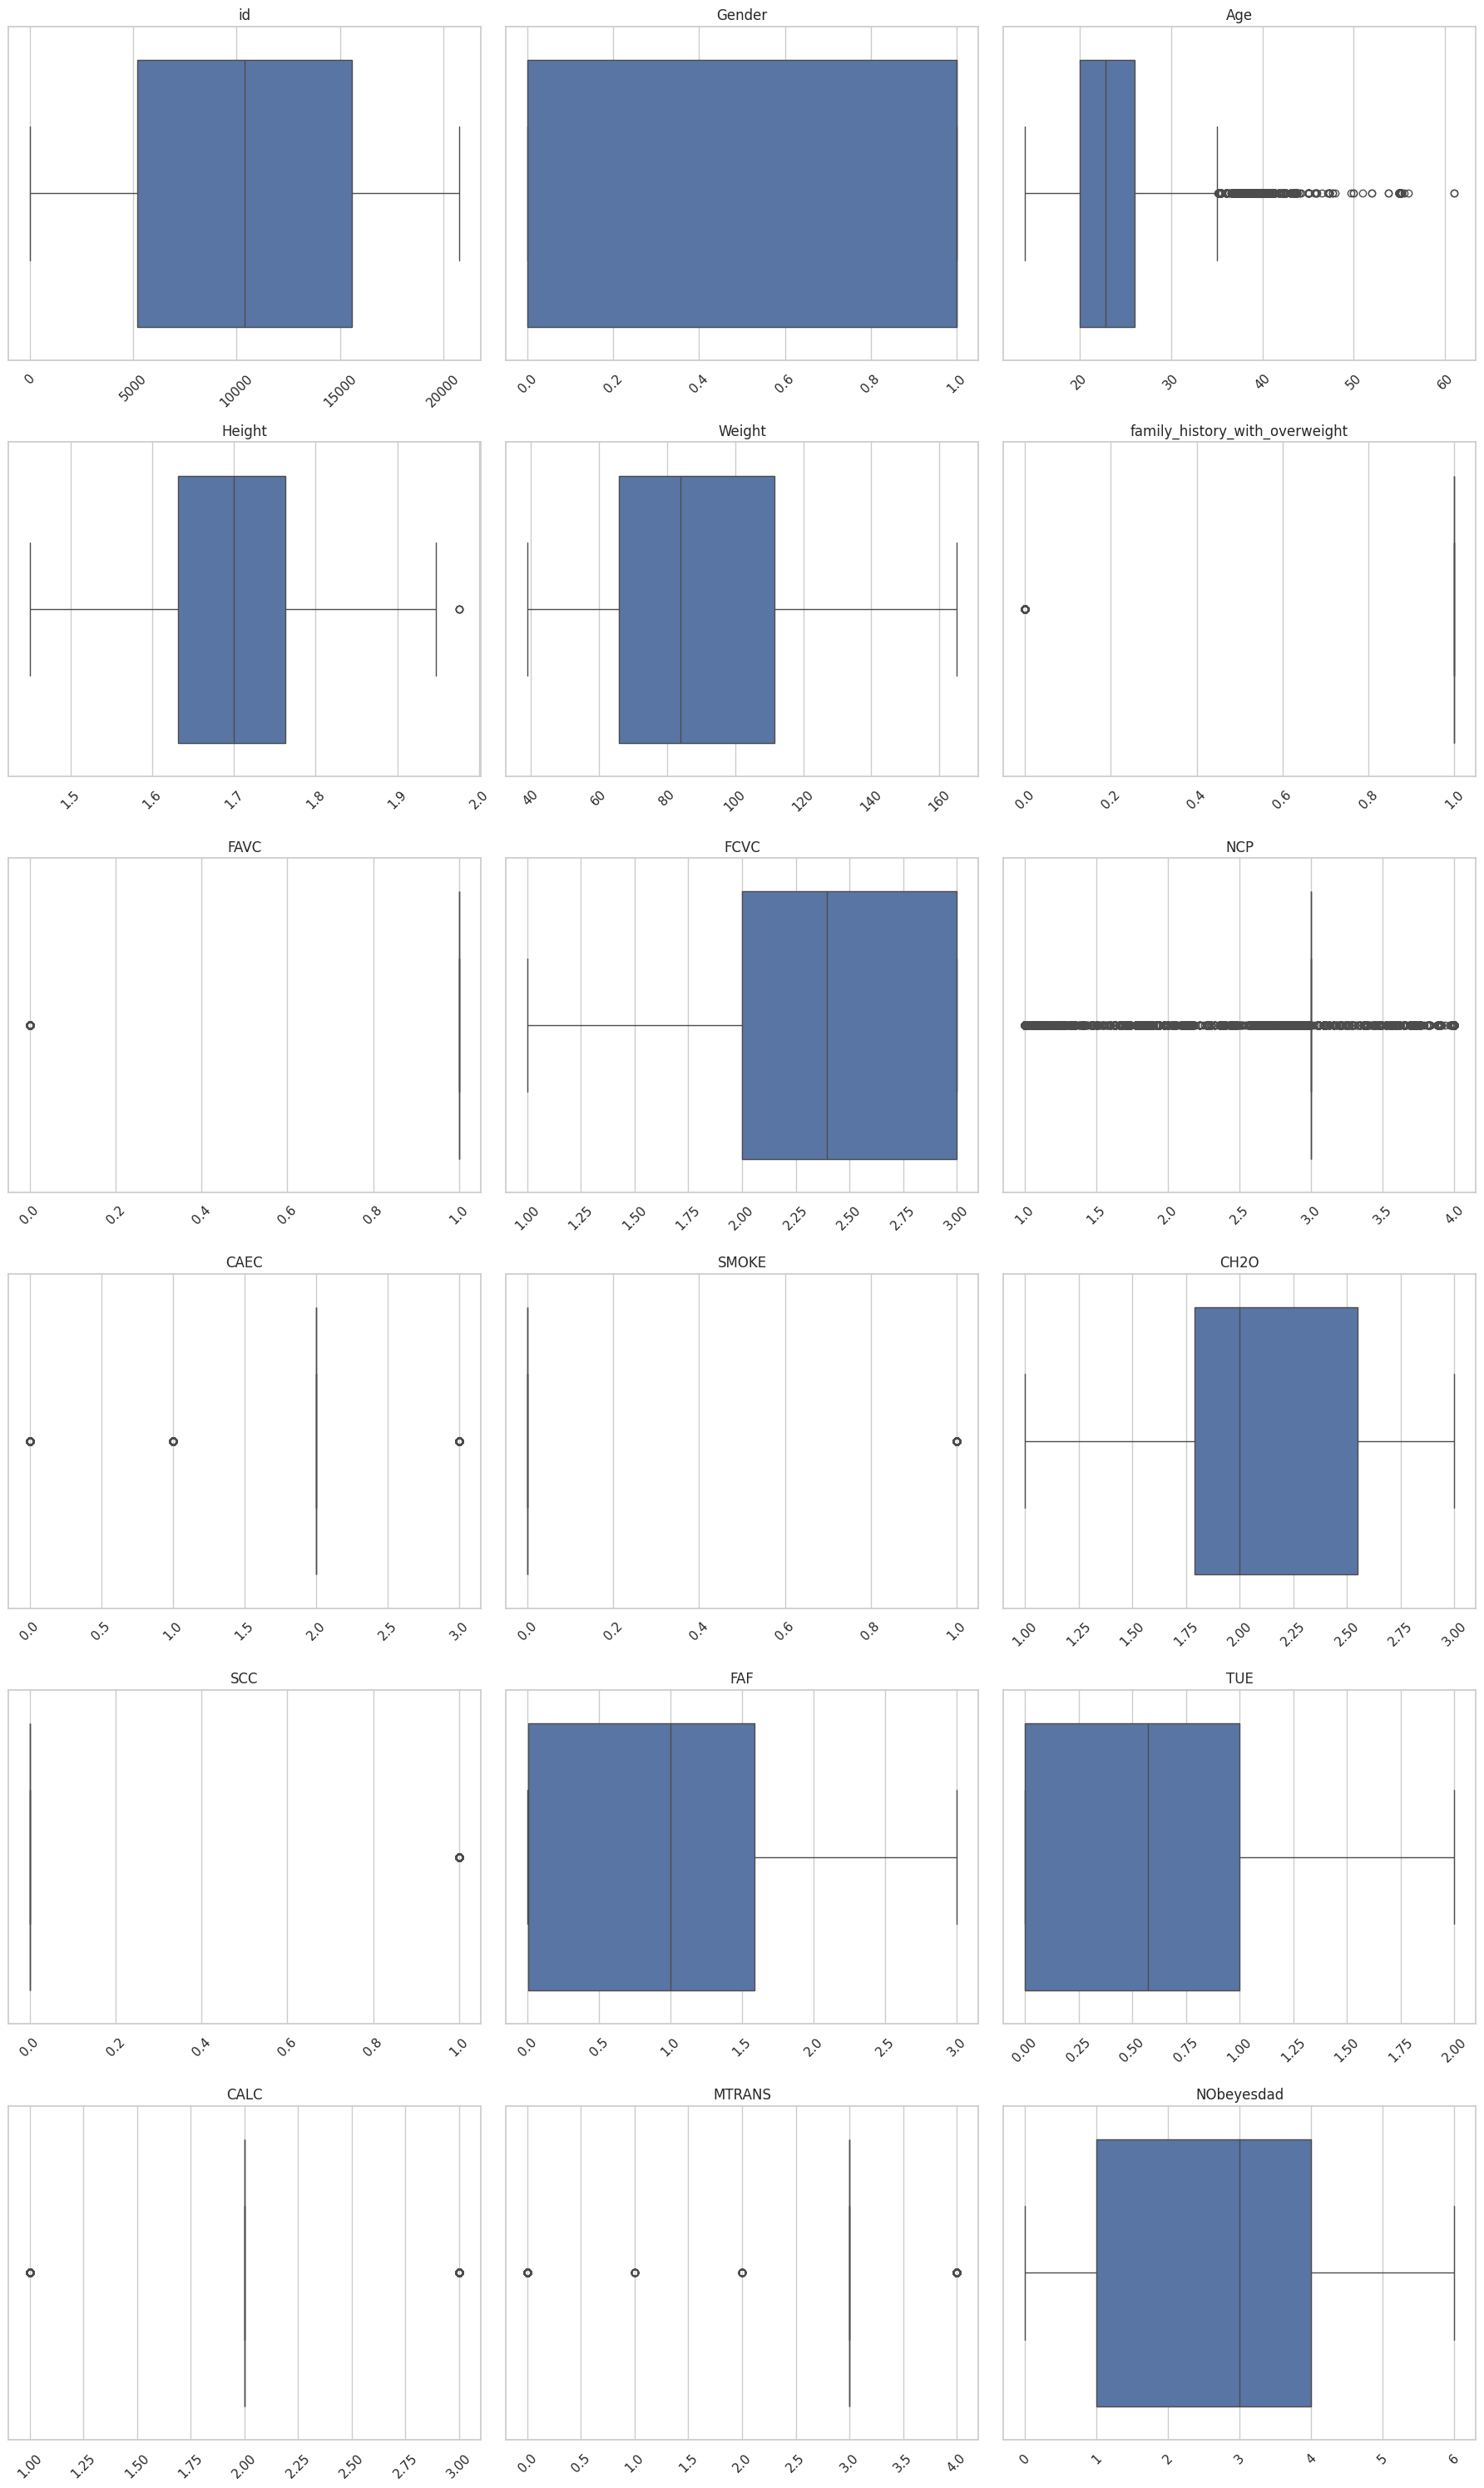

In [ ]:
#checking for outliers in training dataset

num_columns = len(train.columns)  # Total number of columns in the DataFrame
cols = 3  # Number of columns in the subplot grid
rows = (num_columns + cols - 1) // cols  # Calculate number of rows needed
fig, axs = plt.subplots(rows, cols, figsize=(18, 5 * rows))  # Adjust the figure size
axs = axs.flatten()
for i, col in enumerate(train.columns):
    sns.boxplot(x=train[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    for label in axs[i].get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels for better visibility

for j in range(num_columns, len(axs)):
    fig.delaxes(axs[j])  # Remove extra axes for unused subplots

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

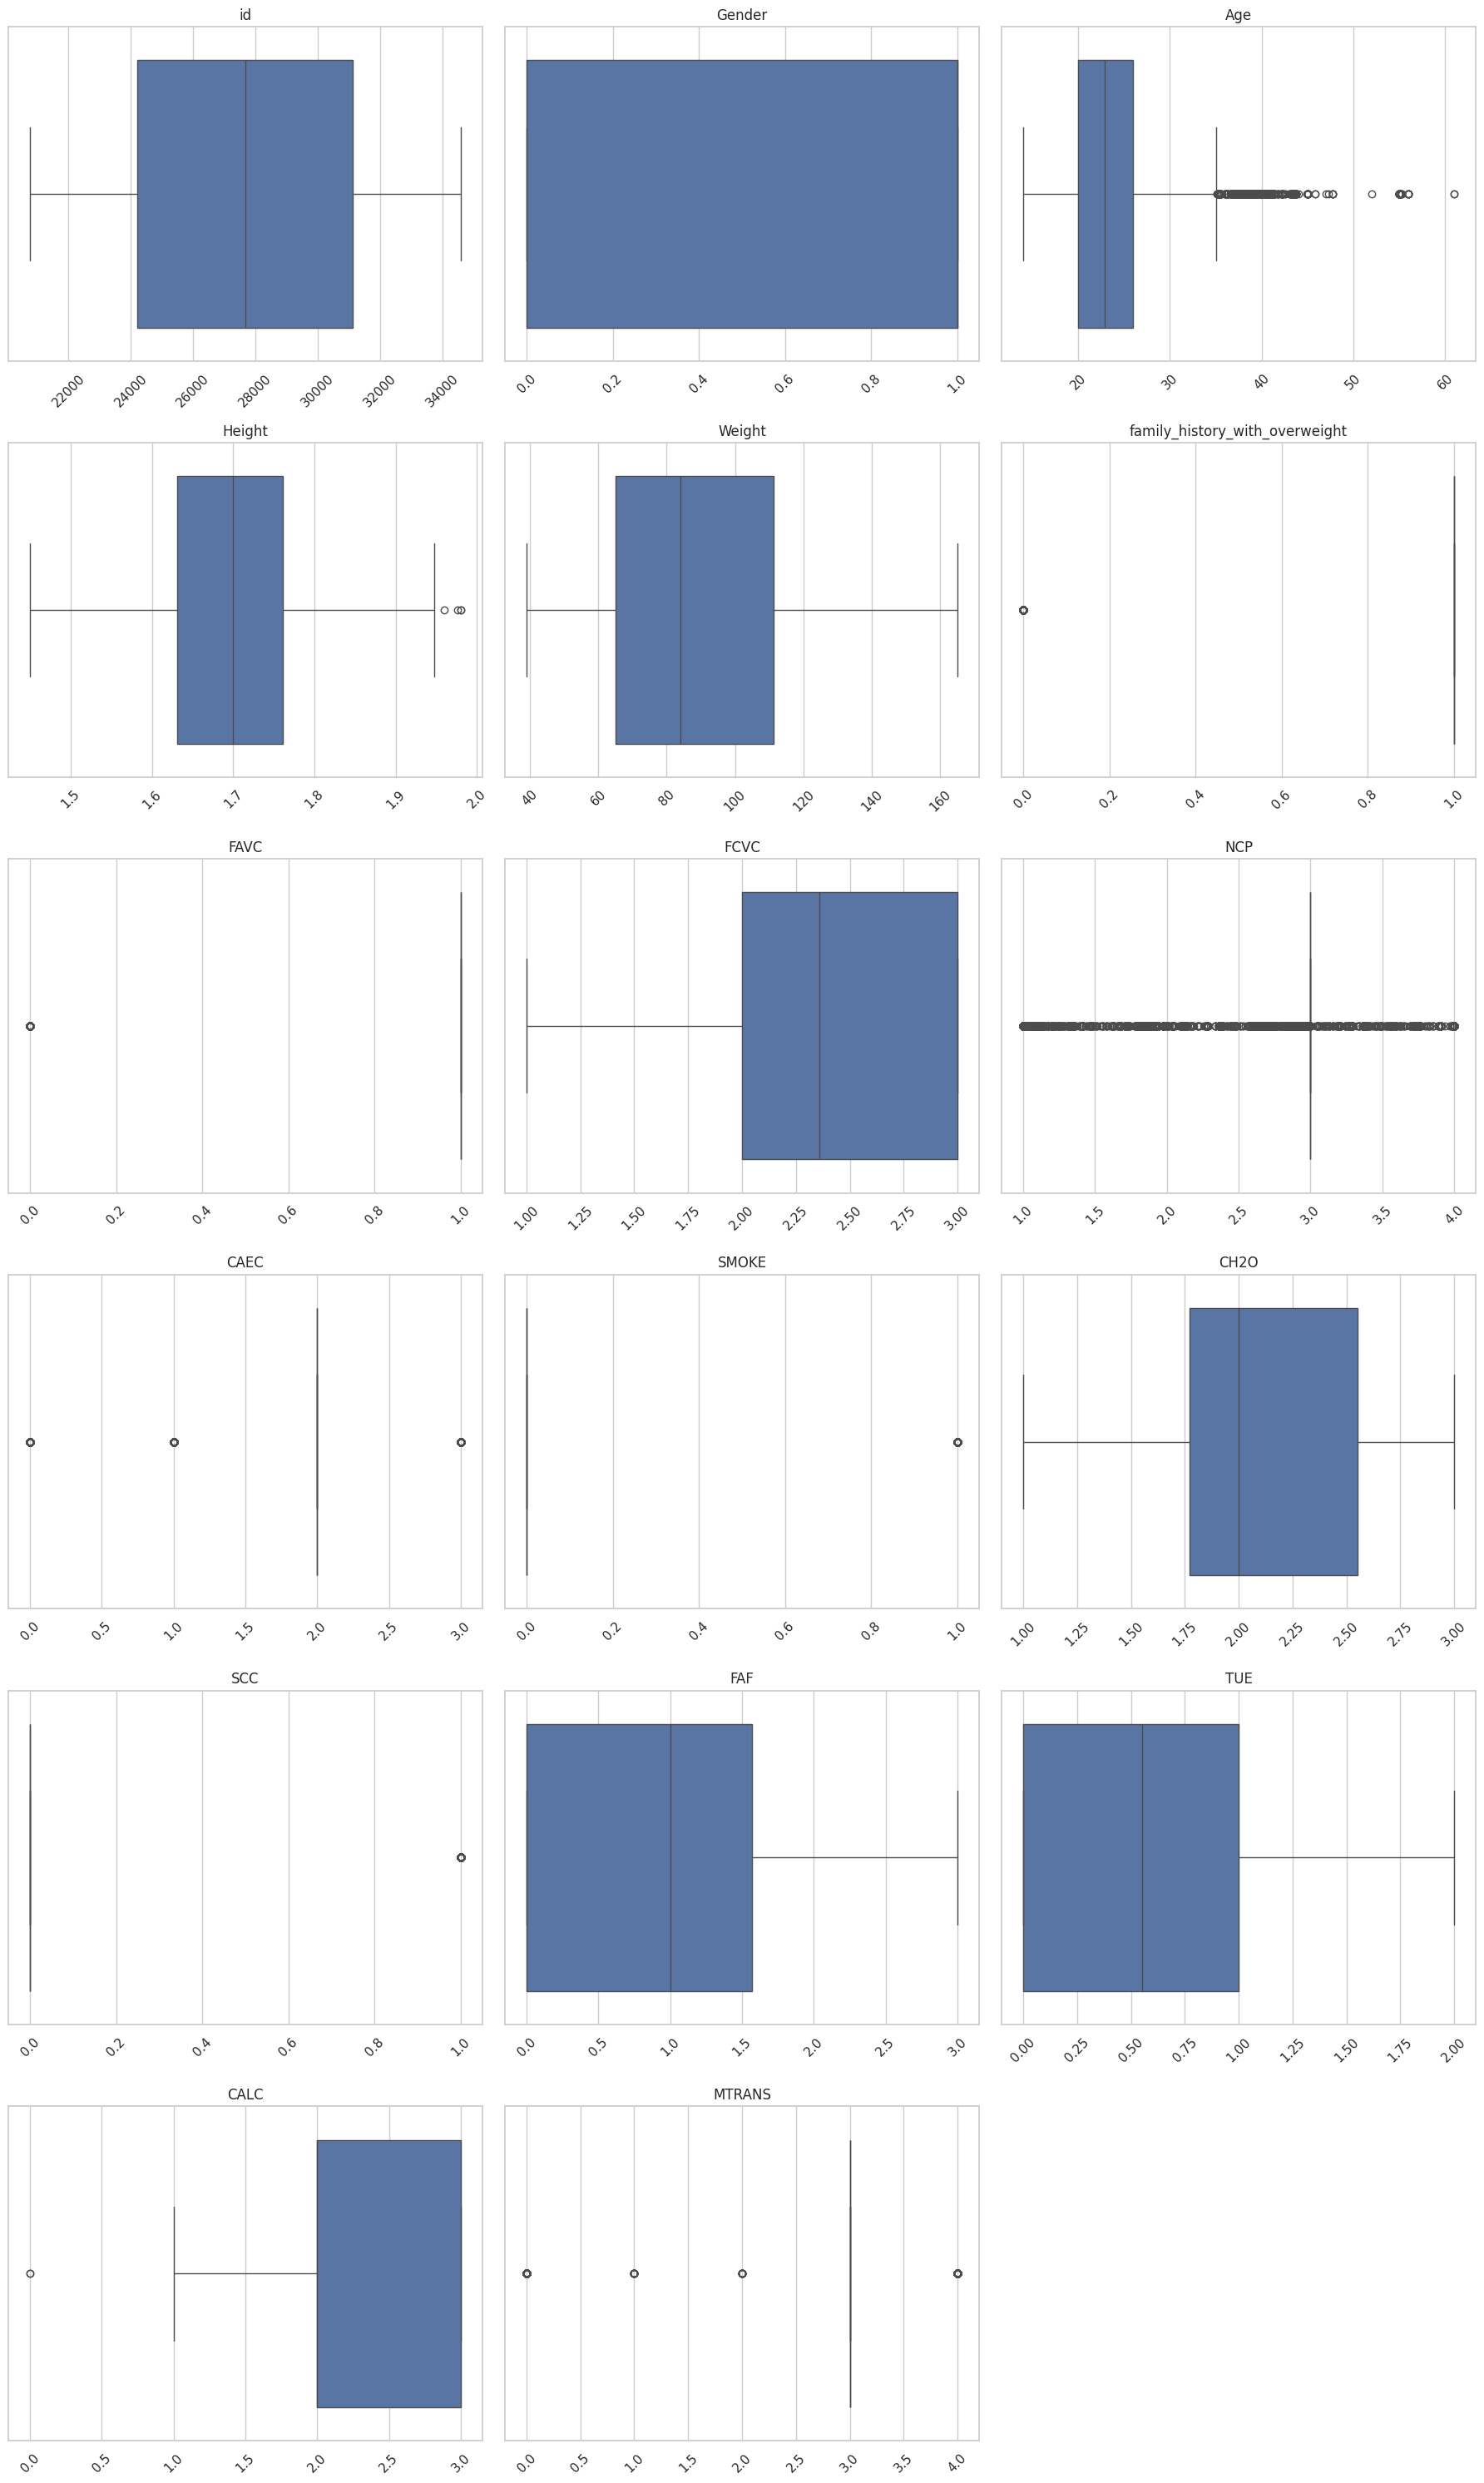

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns only
numeric_columns = test.select_dtypes(include='number').columns

num_columns = len(numeric_columns)  # Total number of numeric columns in the DataFrame
cols = 3  # Number of columns in the subplot grid
rows = (num_columns + cols - 1) // cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(18, 5 * rows))  # Adjust the figure size
axs = axs.flatten()

# Iterate through numeric columns to create boxplots
for i, col in enumerate(numeric_columns):
    # Check for NaN values and filter them out
    data_to_plot = test[col].dropna()

    # Create a boxplot only if there is data to plot
    if not data_to_plot.empty:
        sns.boxplot(x=data_to_plot, ax=axs[i])
        axs[i].set_title(col)
        axs[i].set_xlabel('')  # Clear x-label since it’s a single variable
        axs[i].tick_params(axis='x', rotation=45)  # Rotate labels for better visibility
    else:
        axs[i].set_title(f"No data for {col}")
        axs[i].axis('off')  # Turn off the axis if no data

# Remove extra axes for unused subplots
for j in range(num_columns, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [ ]:
#block of code to remove outliers
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [ ]:
b=['CALC','NCP']
for i in b:
    train=train.drop(i,axis=1)

# SPLITTING UP OF THE DATA INTO TRAINING VALIDATION AND TESTING

In [ ]:
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

#Final split => train-val-testing => 80-10-10 ==> 16605 - 2076 - 2076
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) #80-20
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #20 => 10-10

# RANDOM FOREST MODEL TRAINING AND EVALUATION

In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
                            criterion='gini', bootstrap=True, class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.88      0.88      0.88        33
           2       0.90      0.89      0.89        61
           3       1.00      0.98      0.99       138
           4       1.00      1.00      1.00       403
           5       0.84      0.89      0.86        35
           6       0.76      0.76      0.76        25

    accuracy                           0.96       718
   macro avg       0.90      0.90      0.90       718
weighted avg       0.96      0.96      0.96       718

Accuracy: 0.9637883008356546


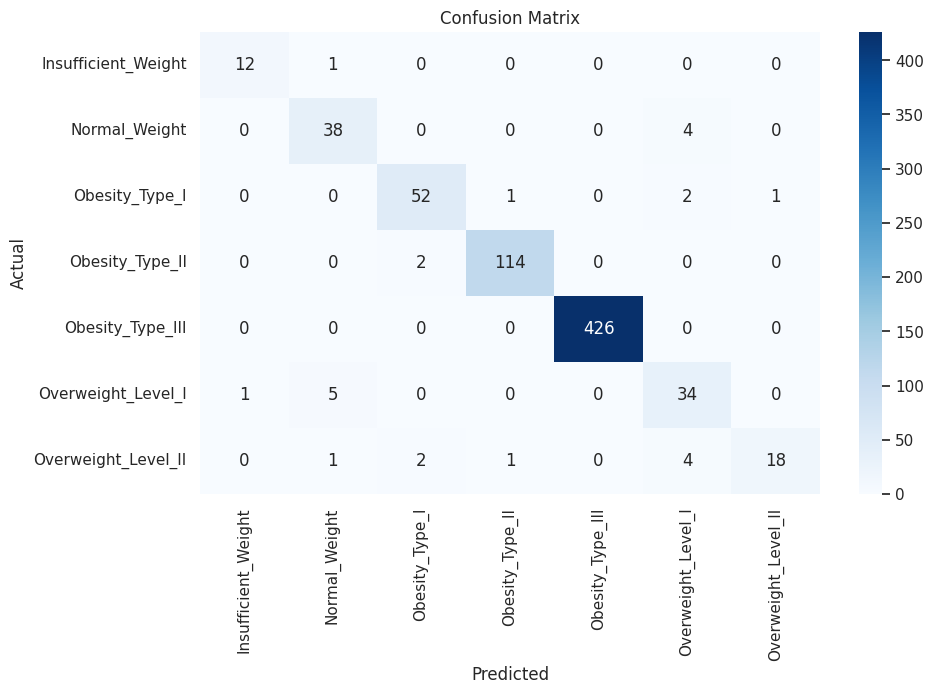

In [ ]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#saving the RF model
import joblib
joblib.dump(rf, '/content/random_forest_model.pkl')

['/content/random_forest_model.pkl']

In [ ]:
#predicted_labels.csv has the predictions made by the model for the 13840 samples of testing dataset.
y_pred_test = rf.predict(test)
output_file = pd.DataFrame({'id': test['id'], 'NObeyesdad': y_pred_test})
output_file['NObeyesdad'] = le.inverse_transform(output_file['NObeyesdad'])
output_file.to_csv('predicted_labels.csv', index=False)

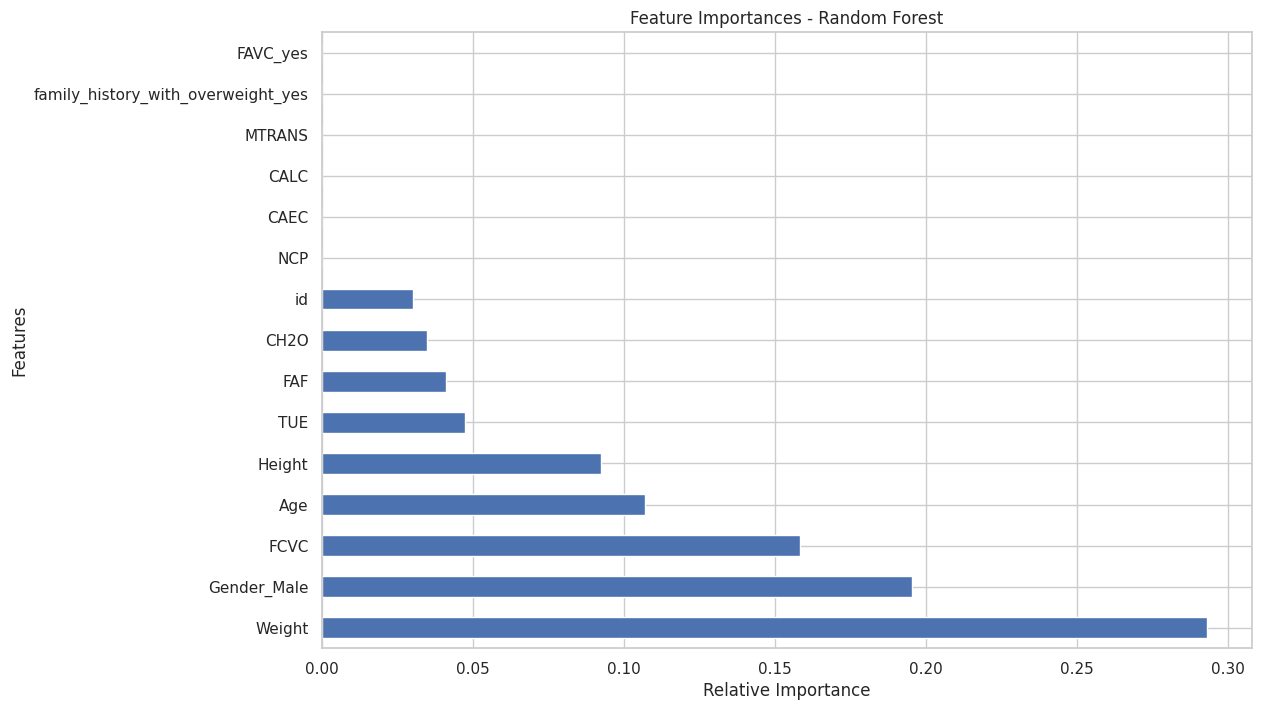

In [ ]:
#Analysing the feature importance of the random forest model
plt.figure(figsize=(12, 8))
feat_importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances_rf.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# XGBOOST MODEL TRAINING AND EVALUATION

In [ ]:
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.94      0.91      0.92        33
           2       0.90      0.90      0.90        61
           3       1.00      0.98      0.99       138
           4       1.00      1.00      1.00       403
           5       0.86      0.89      0.87        35
           6       0.77      0.80      0.78        25

    accuracy                           0.97       718
   macro avg       0.92      0.92      0.92       718
weighted avg       0.97      0.97      0.97       718

Accuracy: 0.9693593314763231


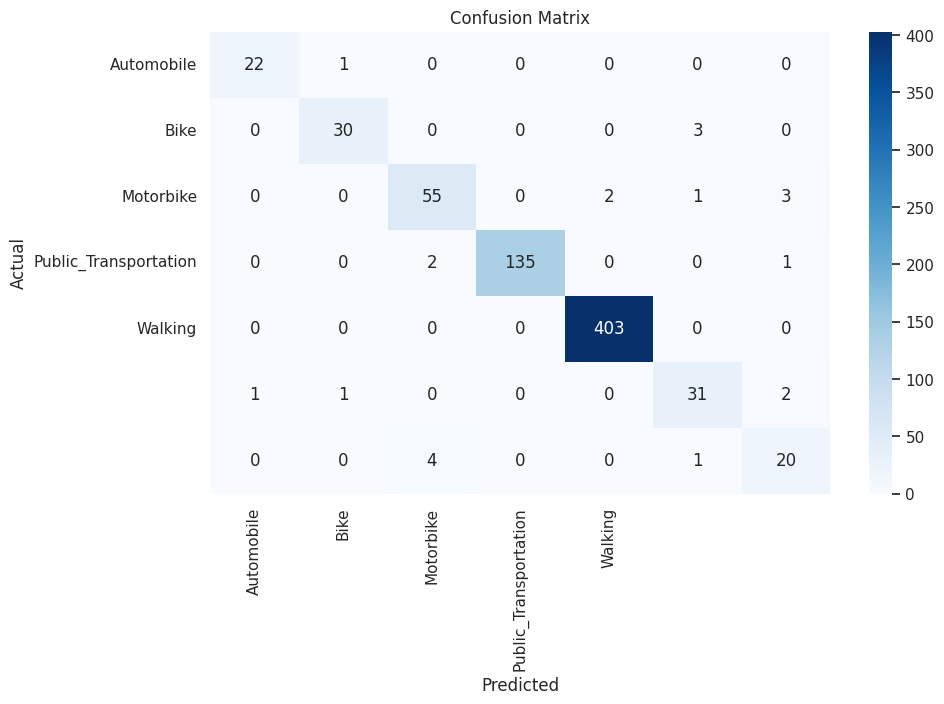

In [ ]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#saving the XGBOOST model
joblib.dump(xgb, '/content/xgboost_model.pkl')

['/content/xgboost_model.pkl']

In [ ]:
#predicted_labels.csv has the predictions made by the model for the 13840 samples of testing dataset.
y_pred_test = rf.predict(test)
output_file = pd.DataFrame({'id': test['id'], 'NObeyesdad': y_pred_test})
output_file['NObeyesdad'] = le.inverse_transform(output_file['NObeyesdad'])
output_file.to_csv('predicted_labels.csv', index=False)

NameError: name 'rf' is not defined

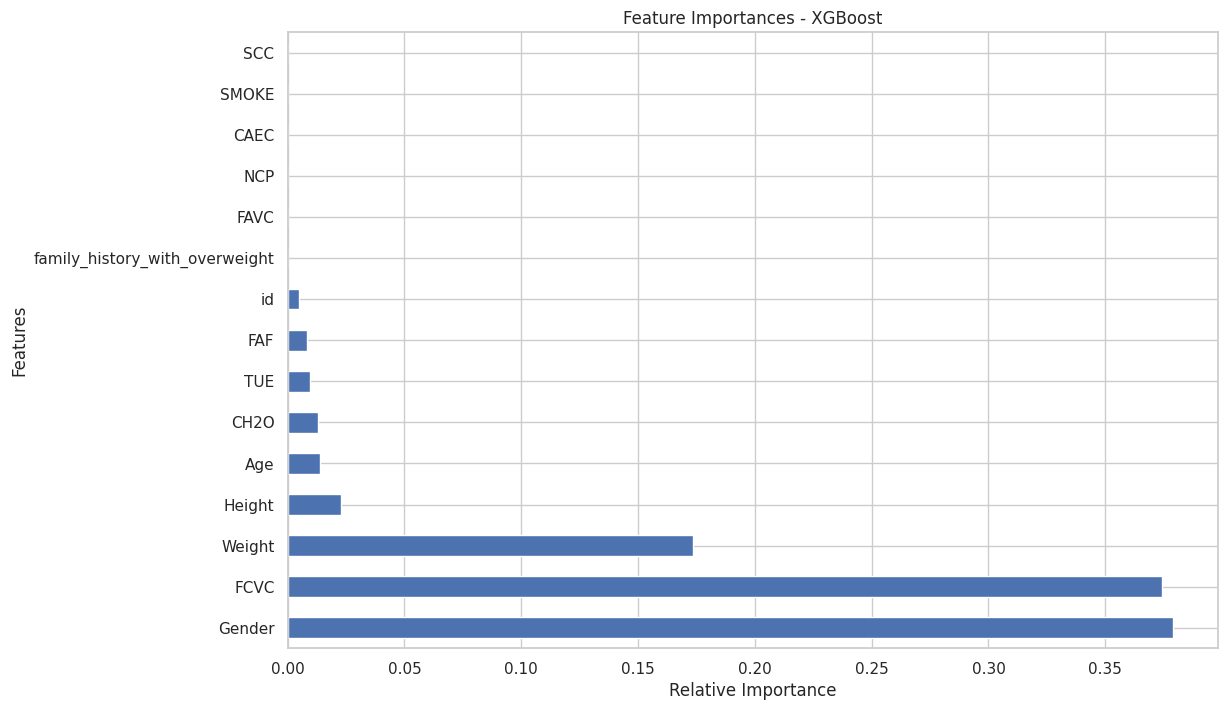

In [ ]:
#Analysing the feature importance of the xgboost model
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset (replace 'your_dataset.csv' with your actual file)
data = pd.read_csv('/content/train.csv')

# Replace 'target_column' with the actual target column name
target_column = 'NObeyesdad'  # Replace with your target column name
X = data.drop(target_column, axis=1)
y = data[target_column]

# Encode categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
X[categorical_columns] = X[categorical_columns].apply(LabelEncoder().fit_transform)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train an XGBoost model to find feature importances (optional step)
initial_model = xgb.XGBClassifier(random_state=42)
initial_model.fit(X, y_encoded)

# Get feature importances
feature_importances = pd.Series(initial_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(4).index.tolist()

print("Top 4 features based on importance:", top_features)

# Create a new dataset with only the top 4 features
X_top4 = X[top_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_top4, y_encoded, test_size=0.2, random_state=42)

# Train the XGBoost model with the top 4 features
model1111 = xgb.XGBClassifier(random_state=42)
model1111.fit(X_train, y_train)

# Make predictions
y_pred = model1111.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using top 4 features:", accuracy)


Top 4 features based on importance: ['Gender', 'Weight', 'FCVC', 'Height']
Accuracy using top 4 features: 0.8822254335260116


In [ ]:
print("Feature names used in training:", X_top4.columns.tolist())

Feature names used in training: ['Gender', 'Weight', 'FCVC', 'Height']


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model1111, 'xgb4.pkl')

['xgb4.pkl']

In [ ]:
# Add this code temporarily at the start to check model's expected features
model = joblib.load('xgboost_top4_features_model.pkl')
print("Model feature names:", model.get_booster().feature_names)

Model feature names: ['Gender', 'Weight', 'FCVC', 'Height']


In [ ]:
print("PowerTransformer feature names:", pt.get_feature_names_out())  # if available

PowerTransformer feature names: ['Height' 'Weight' 'FCVC' 'Gender']


In [ ]:
from xgboost import XGBClassifier

# Train the model with explicit feature names
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_top4, y_train)

# Save both the model and feature names
model_info = {
    'model': xgb_model,
    'feature_names': top_features,
    'label_encoder': label_encoder,
    'power_transformer': pt
}
joblib.dump(model_info, 'xgboost_top4_features_model.pkl')

# Later, when loading and using the model:
def load_and_prepare_data(data, model_info):
    model = model_info['model']
    feature_names = model_info['feature_names']
    label_encoder = model_info['label_encoder']
    power_transformer = model_info['power_transformer']

    # Ensure data has the same features in the same order
    X = data[feature_names].copy()

    # Apply the same preprocessing
    categorical_columns = X.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        X[col] = label_encoder.transform(X[col])

    # Apply power transformation if needed
    numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_columns) > 0:
        X[numeric_columns] = power_transformer.transform(X[numeric_columns])

    return X


XGBoostError: [07:37:29] /workspace/src/data/data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (5744 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7feeee82dcbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4b3692) [0x7feeeeab3692]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4b53c0) [0x7feeeeab53c0]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xb2) [0x7feeee735032]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7fefa081be2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7fefa0818493]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x7fefa08413e9]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x7fefa0840a00]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x25b) [0x5cc3e6c2d2db]



# SVM MODEL TRAINING AND EVALUATION

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.86      0.86      0.86        42
           2       0.91      0.89      0.90        56
           3       0.98      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.73      0.80      0.76        40
           6       0.86      0.73      0.79        26

    accuracy                           0.96       719
   macro avg       0.90      0.89      0.89       719
weighted avg       0.96      0.96      0.96       719


Accuracy Score: 0.9596662030598053


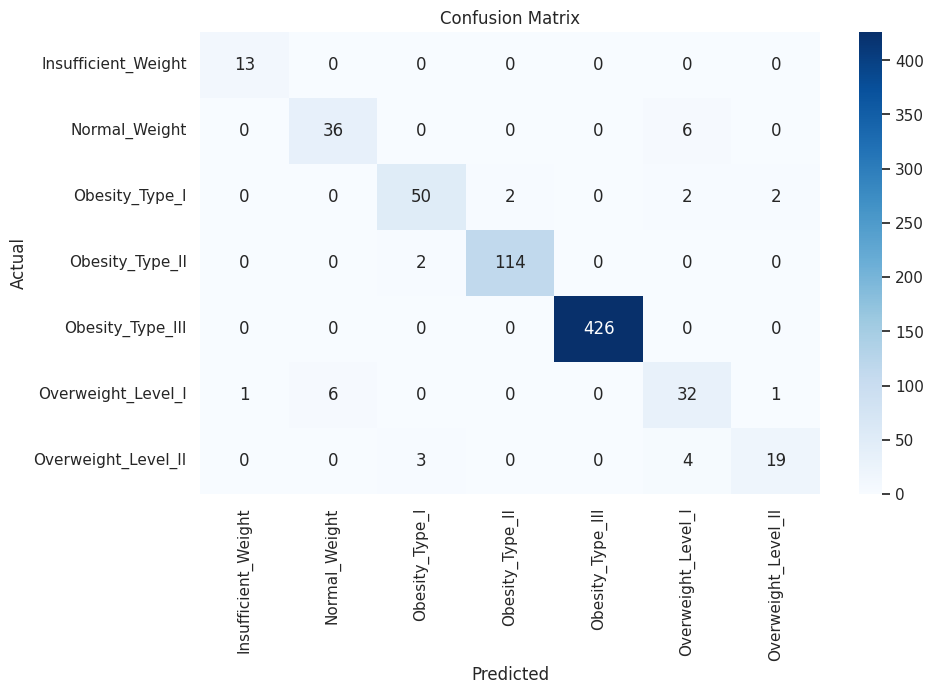

In [ ]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Saving the trained SVM model
joblib.dump(svm_model, '/content/svm_model.pkl')

['/content/svm_model.pkl']

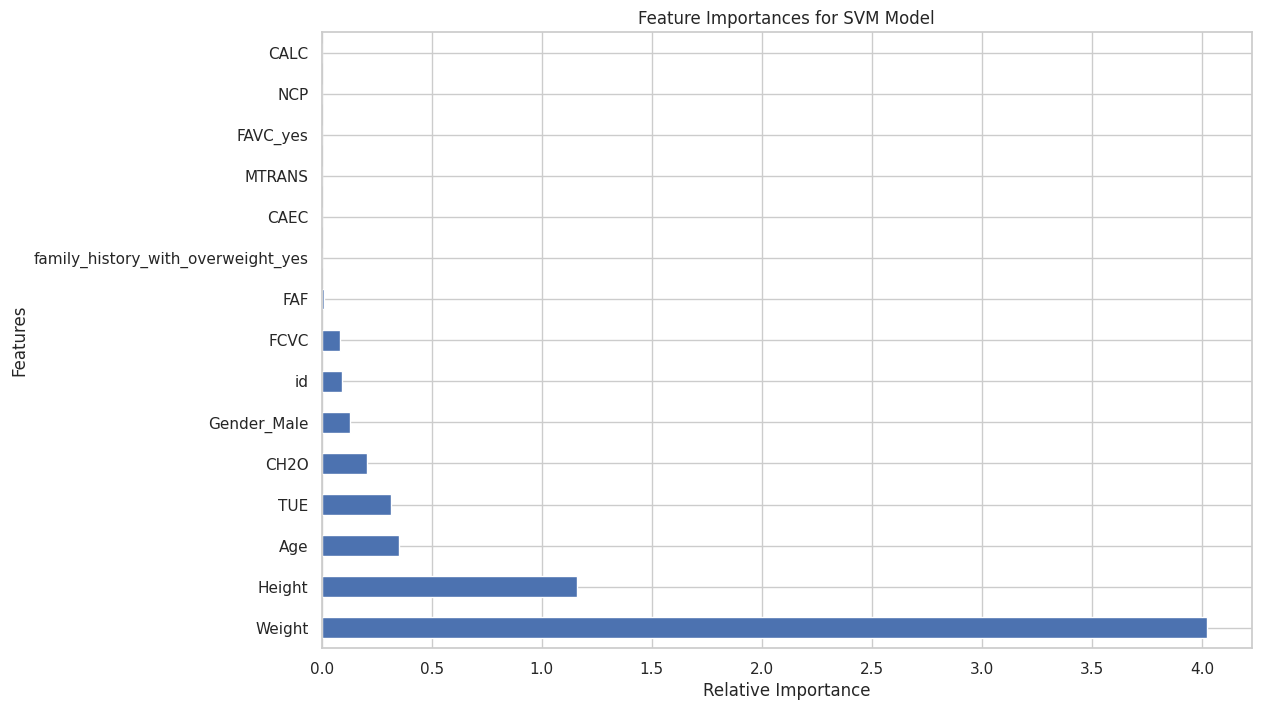

In [ ]:
# Analyzing the feature importance of the SVM model

plt.figure(figsize=(12, 8))
feat_importances = pd.Series(np.abs(svm_model.coef_[0]), index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances for SVM Model')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# LOGISTIC REGRESSION MODEL TRAINING AND EVALUATION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42, max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("\nAccuracy Score - Logistic Regression:", accuracy_score(y_test, y_pred_logreg))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.83      0.83      0.83        42
           2       0.92      0.86      0.89        56
           3       0.97      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.68      0.80      0.74        40
           6       0.84      0.62      0.71        26

    accuracy                           0.95       719
   macro avg       0.87      0.87      0.87       719
weighted avg       0.95      0.95      0.95       719


Accuracy Score - Logistic Regression: 0.9513212795549374


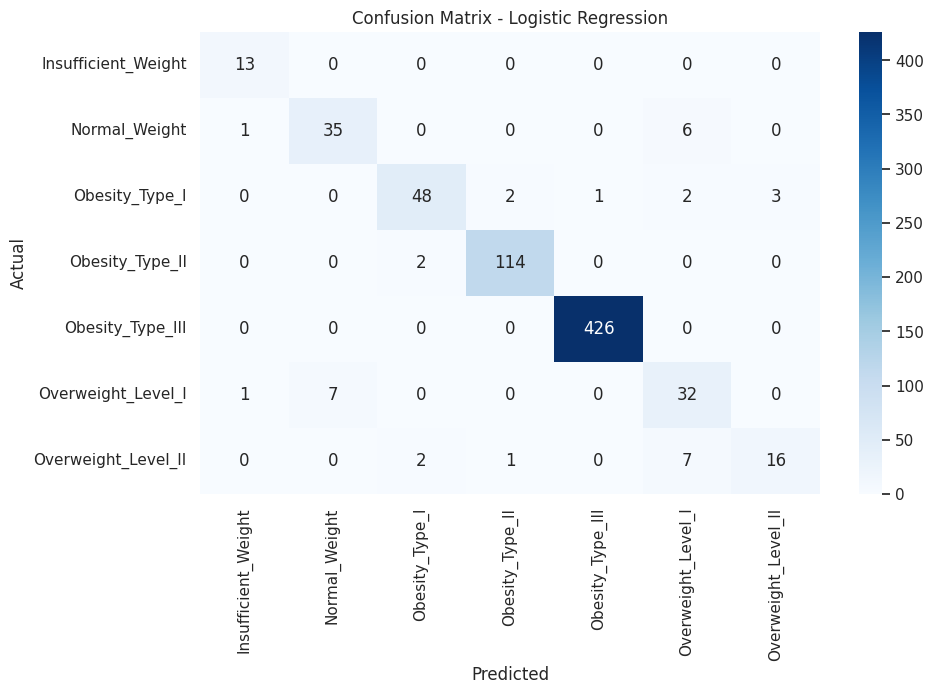

In [ ]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [ ]:
joblib.dump(logreg, '/content/logistic_regression_model.pkl')

['/content/logistic_regression_model.pkl']

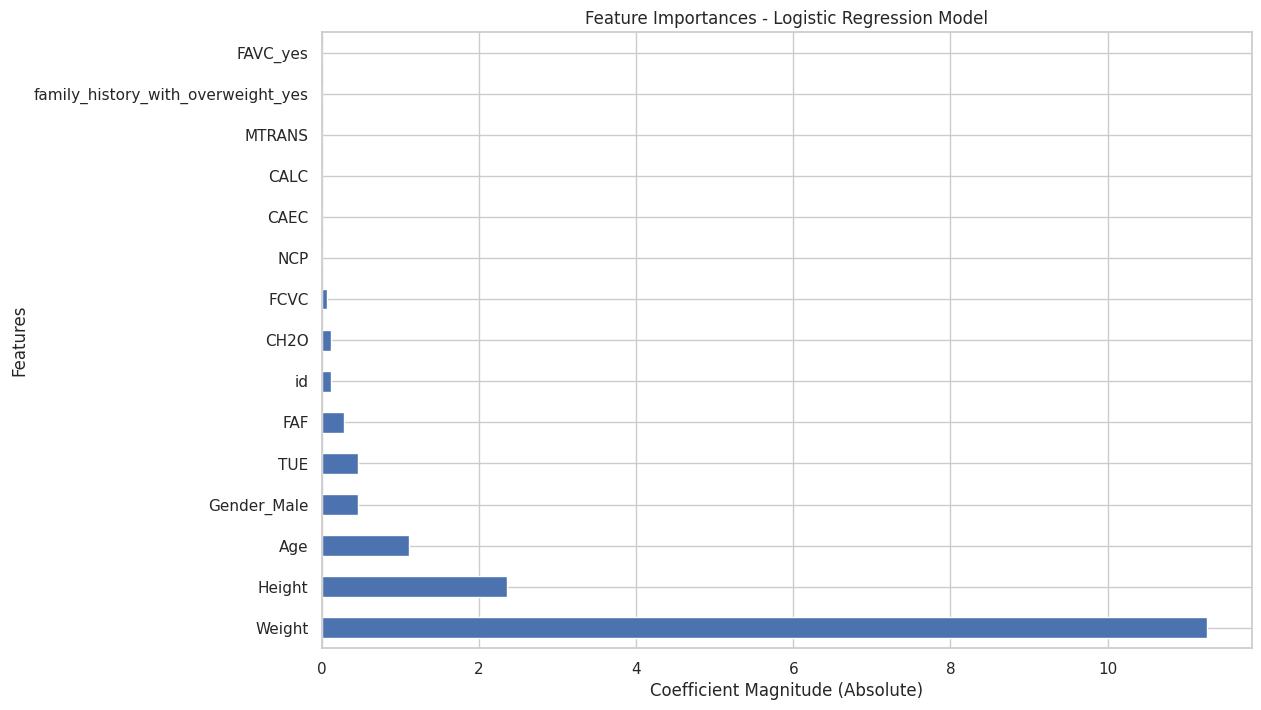

In [ ]:
coefficients = np.abs(logreg.coef_[0])
feat_importances_logreg = pd.Series(coefficients, index=X.columns)

# Plot the top 15 feature importances
plt.figure(figsize=(12, 8))
feat_importances_logreg.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - Logistic Regression Model')
plt.xlabel('Coefficient Magnitude (Absolute)')
plt.ylabel('Features')
plt.show()

# DECISION TREE MODEL TRAINING AND EVALUATION

In [ ]:
# Decision Tree Model Training and Evaluation
dt = DecisionTreeClassifier(random_state=45, max_depth=9, )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.81      0.90      0.85        42
           2       0.91      0.91      0.91        56
           3       0.99      0.98      0.99       116
           4       1.00      0.99      0.99       426
           5       0.78      0.78      0.78        40
           6       0.88      0.85      0.86        26

    accuracy                           0.96       719
   macro avg       0.90      0.89      0.89       719
weighted avg       0.96      0.96      0.96       719


Accuracy Score: 0.9582753824756607


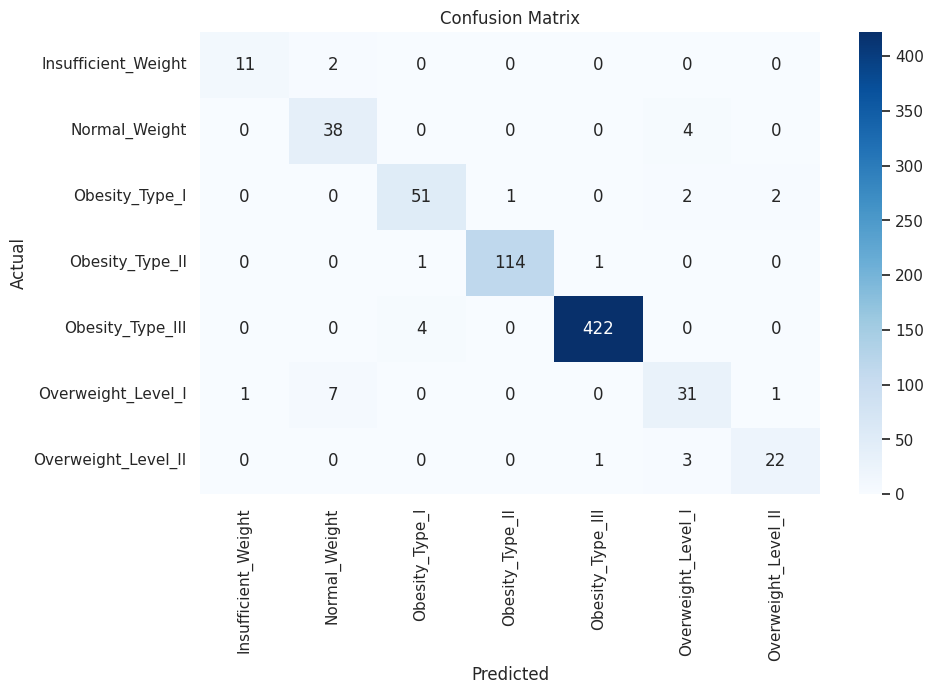

In [ ]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Saving the trained SVM model
joblib.dump(dt, '/content/dt.pkl')

['/content/dt.pkl']

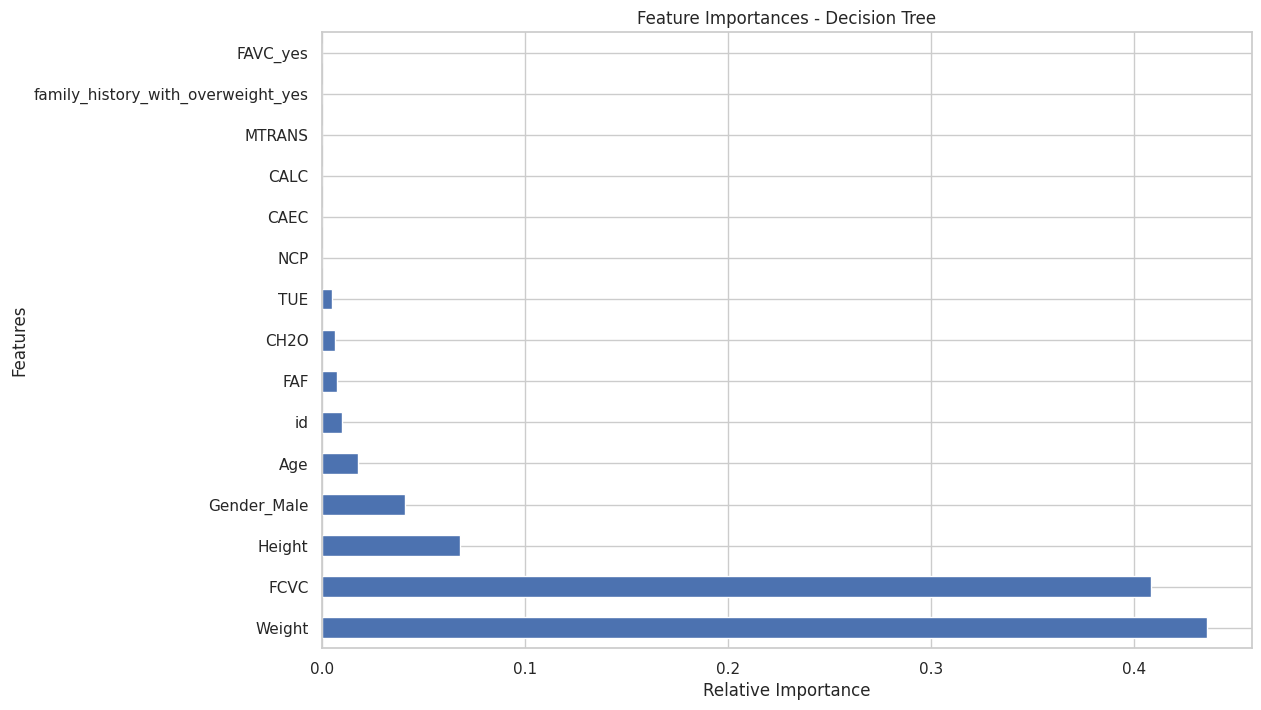

In [ ]:
# Analyze feature importances
plt.figure(figsize=(12, 8))
feature_names = X.columns.tolist()
feat_importances_dt = pd.Series(dt.feature_importances_, index=feature_names)
feat_importances_dt.nlargest(15).plot(kind='barh')  # Plotting the top 15 features
plt.title('Feature Importances - Decision Tree')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

#**KNN TRAINING AND EVALUATION**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

# Predict on the test set
y_pred=KNN_model.predict(X_test)

# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.54      0.62      0.58        42
           2       0.75      0.64      0.69        56
           3       0.90      0.97      0.94       116
           4       0.99      1.00      1.00       426
           5       0.50      0.55      0.52        40
           6       0.57      0.31      0.40        26

    accuracy                           0.89       719
   macro avg       0.73      0.68      0.70       719
weighted avg       0.89      0.89      0.89       719


Accuracy Score: 0.8901251738525731


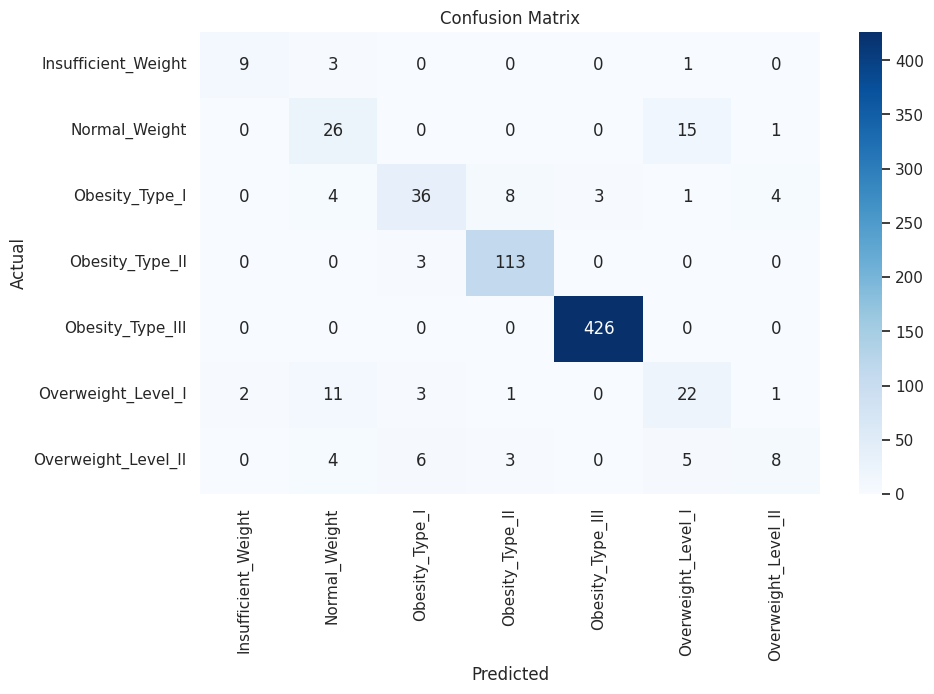

In [ ]:
#Confusion Matrix for KNN
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Saving the KNN model
joblib.dump(KNN_model, '/content/KNN_model.pkl')

['/content/KNN_model.pkl']

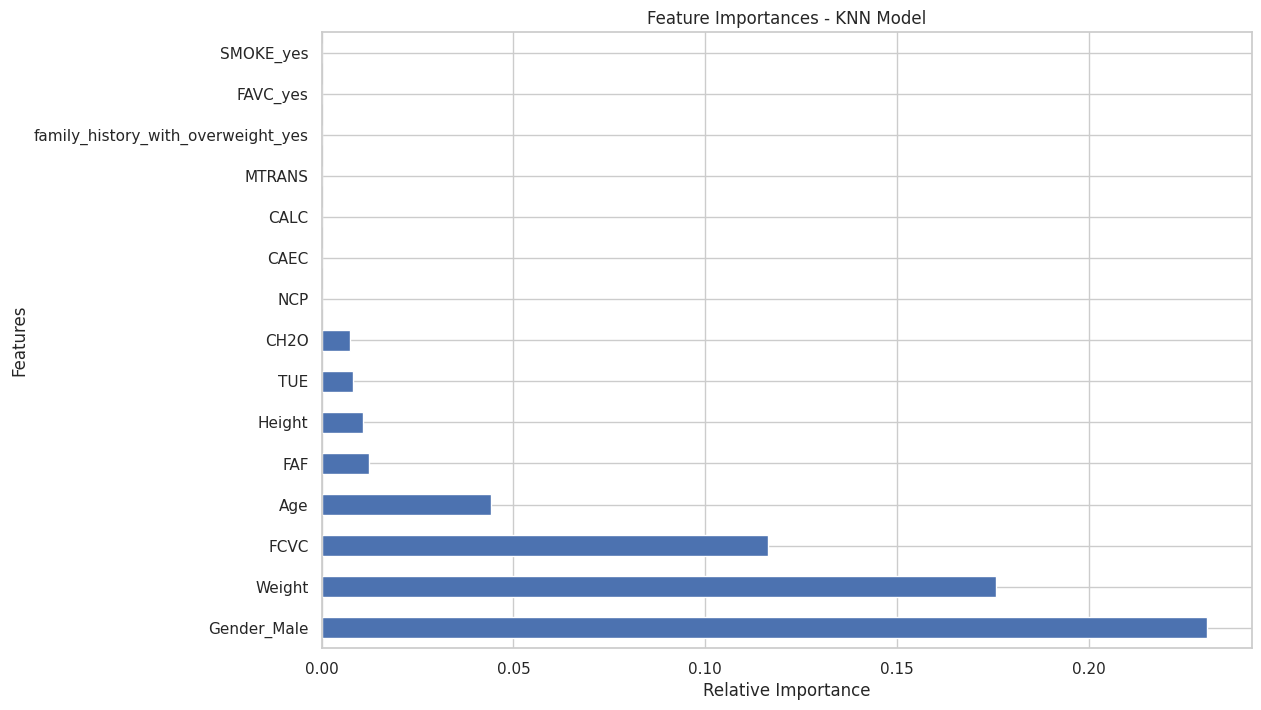

In [ ]:
# Analyzing the feature importance of the KNN model

results = permutation_importance(KNN_model, X_test, y_test, n_repeats=10, random_state=42) # Calculate permutation importance
feat_importances_knn = pd.Series(results.importances_mean, index=X.columns)
plt.figure(figsize=(12, 8))
feat_importances_knn.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - KNN Model')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# SINGLE LAYER PERCEPTRON (SLP) MODEL TRAINING AND EVALUATION


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Single Layer Perceptron Model
slp_model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
slp_model.fit(X_train, y_train)

# Predicting with the model
y_pred = slp_model.predict(X_test)

In [ ]:
# Classification report and accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.82      0.82      0.82        33
           2       0.93      0.89      0.91        61
           3       0.99      0.97      0.98       138
           4       0.99      1.00      1.00       403
           5       0.74      0.83      0.78        35
           6       0.83      0.80      0.82        25

    accuracy                           0.96       718
   macro avg       0.89      0.89      0.89       718
weighted avg       0.96      0.96      0.96       718


Accuracy Score: 0.958217270194986


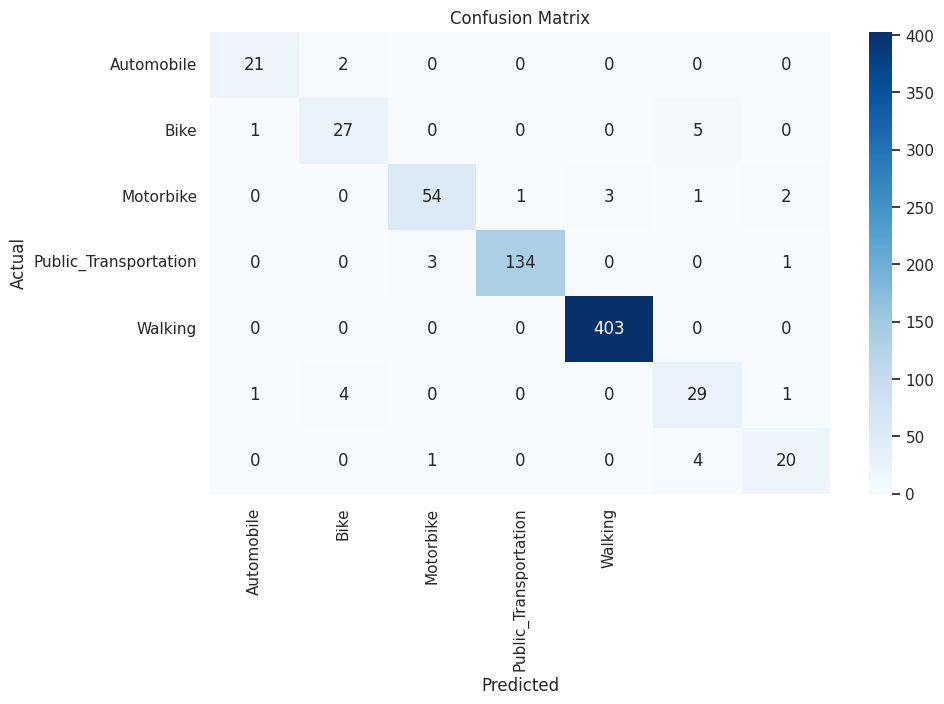

In [ ]:
# Confusion matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
joblib.dump(slp_model, '/content/slp_model.pkl')

['/content/slp_model.pkl']

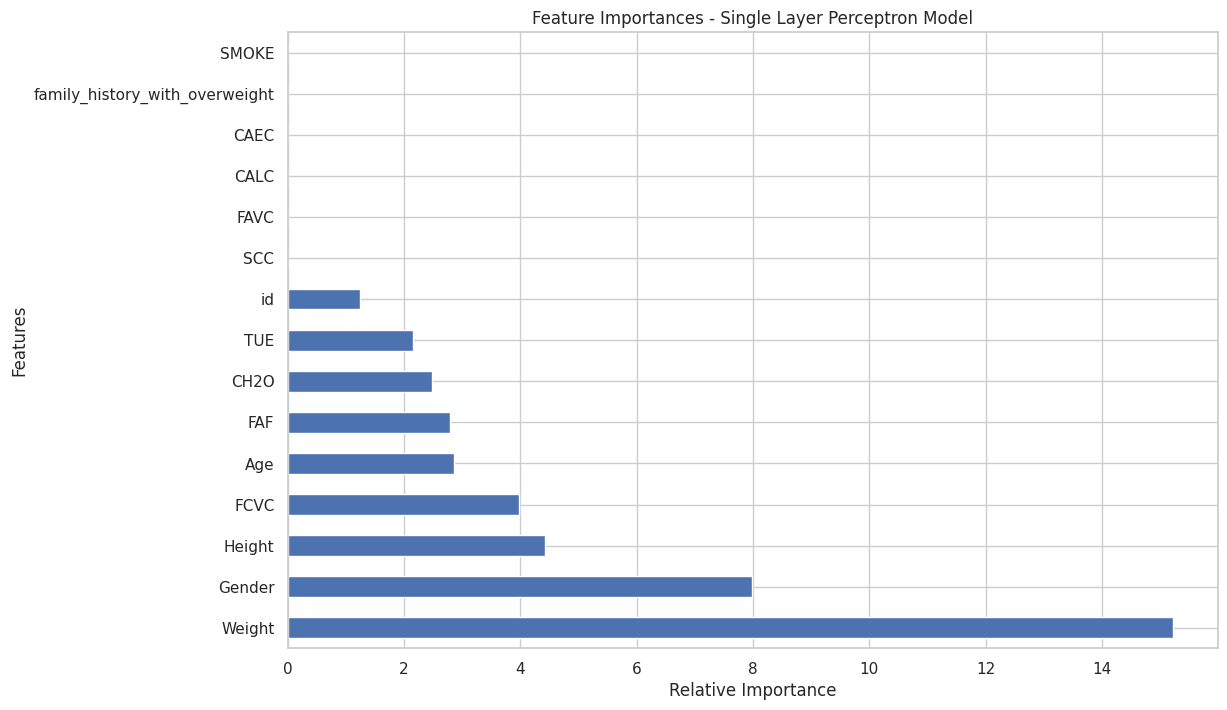

In [ ]:
# Analyzing the feature importance (weights) of the SLP model
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(np.abs(slp_model.coefs_[0]).sum(axis=1), index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances - Single Layer Perceptron Model')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
## Hyper-Parameter Tuning Using GridSearchCV
# Defining  the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,)],  # Number of neurons in the hidden layer
    'activation': ['relu', 'tanh', 'logistic'],  # Activation function
    'alpha': [0.0001, 0.001, 0.01],             # Regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1],    # Initial learning rate
    'max_iter': [500, 1000]                      # Maximum number of iterations
}

slp_model = MLPClassifier(random_state=42)

grid_search = GridSearchCV(estimator=slp_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

#Classification report and accuracy score
print("Best Parameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Best Parameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (15,), 'learning_rate_init': 0.01, 'max_iter': 500}

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.87      0.82      0.84        33
           2       0.95      0.87      0.91        61
           3       0.99      0.98      0.99       138
           4       0.99      1.00      1.00       403
           5       0.78      0.91      0.84        35
           6       0.80      0.80      0.80        25

    accuracy                           0.96       718
   macro avg       0.90      0.89      0.89       718
weighted avg       0.96      0.96      0.96       718


Accuracy Score: 0.9610027855153204


In [ ]:
## Hyper-parameter tuning using RandomizedSearchCV
# Define the parameter distribution with an expanded search space
param_dist = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (10, 10), (20, 10), (30, 20)],  # More configurations
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': uniform(0.00001, 0.1),  # Wider range for alpha
    'learning_rate_init': uniform(0.0001, 0.1),  # Wider range for initial learning rate
    'max_iter': randint(500, 1500)  # Increased max_iter range to give more time to converge
}

# Initialize the model
slp_model = MLPClassifier(random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=slp_model,
    param_distributions=param_dist,
    n_iter=50,            # Increased number of parameter settings sampled
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,            # Use all processors
    random_state=42,
    verbose=2             # Increase verbosity for progress insight
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and best cross-validated score
print("Best Parameters (Randomized Search):", random_search.best_params_)
print("Best Accuracy (Randomized Search):", random_search.best_score_)

# Evaluate on test data
y_pred_best = random_search.best_estimator_.predict(X_test)
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))
print("\nTest Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters (Randomized Search): {'activation': 'logistic', 'alpha': 0.04104829230356298, 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.02040612247347694, 'max_iter': 1024}
Best Accuracy (Randomized Search): 0.9484769364664926

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.88      0.83      0.85        42
           2       0.94      0.80      0.87        56
           3       0.99      0.98      0.99       116
           4       1.00      1.00      1.00       426
           5       0.65      0.85      0.74        40
           6       0.77      0.65      0.71        26

    accuracy                           0.95       719
   macro avg       0.88      0.87      0.87       719
weighted avg       0.95      0.95      0.95       719


Test Accuracy (Best Model): 0.9513212795549374


#MULTILAYER PERCEPTRON MODEL TRAINING AND EVALUATION

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)


y_pred_mlp = mlp.predict(X_test)

print('MLP Classification Report:\n', classification_report(y_test, y_pred_mlp))
print('MLP Accuracy:', accuracy_score(y_test, y_pred_mlp))


MLP Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.77      0.86      0.81        42
           2       0.87      0.84      0.85        56
           3       0.97      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.69      0.68      0.68        40
           6       0.73      0.62      0.67        26

    accuracy                           0.94       719
   macro avg       0.84      0.84      0.84       719
weighted avg       0.94      0.94      0.94       719

MLP Accuracy: 0.9429763560500696


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


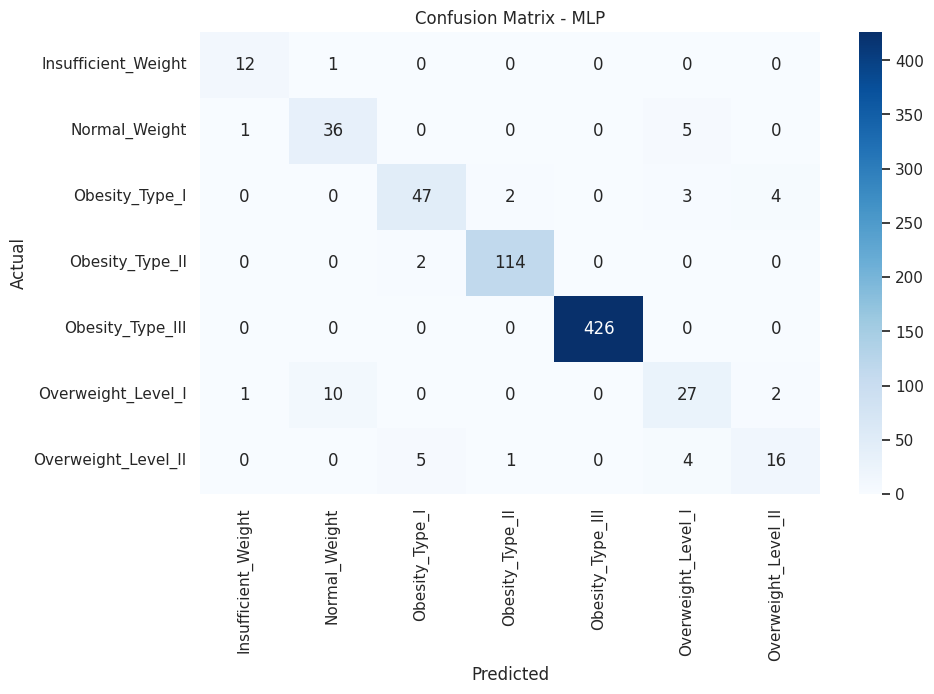

In [ ]:
plt.figure(figsize=(10, 6))
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

In [ ]:
joblib.dump(mlp, '/content/mlp_model.pkl')

['/content/mlp_model.pkl']

In [ ]:
## Hyper-parameter tuning using RandomizedSearchCV

# Define hyperparameter distributions for Randomized Search
param_dist = {
    'hidden_layer_sizes': [(100, 50), (50, 25), (100,), (50, 50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': uniform(0.0001, 0.01),       # L2 penalty parameter
    'learning_rate_init': uniform(0.001, 0.1),
    'max_iter': randint(200, 500)         # Increasing max iterations
}

# Initialize the model
mlp = MLPClassifier(solver='adam', random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=30,            # Number of parameter settings sampled
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,            # Use all processors
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Predictions with the best model
y_pred_mlp_random = random_search.best_estimator_.predict(X_test)

# Evaluation
print("Best Parameters (Randomized Search):", random_search.best_params_)
print("\nMLP Classification Report (Randomized Search):\n", classification_report(y_test, y_pred_mlp_random))
print("\nMLP Accuracy (Randomized Search):", accuracy_score(y_test, y_pred_mlp_random))

Best Parameters (Randomized Search): {'activation': 'logistic', 'alpha': 0.008001755405312056, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.008404465173409037, 'max_iter': 430}

MLP Classification Report (Randomized Search):
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.86      0.88      0.87        42
           2       0.89      0.84      0.86        56
           3       0.99      0.98      0.99       116
           4       1.00      1.00      1.00       426
           5       0.64      0.80      0.71        40
           6       0.65      0.42      0.51        26

    accuracy                           0.95       719
   macro avg       0.85      0.85      0.84       719
weighted avg       0.95      0.95      0.94       719


MLP Accuracy (Randomized Search): 0.9457579972183588


#GAUSSIAN NAIVE BAYES MODEL TRAINING AND EVALUATION


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

print('Naive Bayes Classification Report:\n', classification_report(y_test, y_pred_nb))
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.63      0.52      0.57        42
           2       0.40      0.07      0.12        56
           3       0.73      1.00      0.85       116
           4       0.97      1.00      0.98       426
           5       0.48      0.55      0.51        40
           6       0.72      0.50      0.59        26

    accuracy                           0.86       719
   macro avg       0.69      0.65      0.65       719
weighted avg       0.83      0.86      0.83       719

Naive Bayes Accuracy: 0.8553546592489569


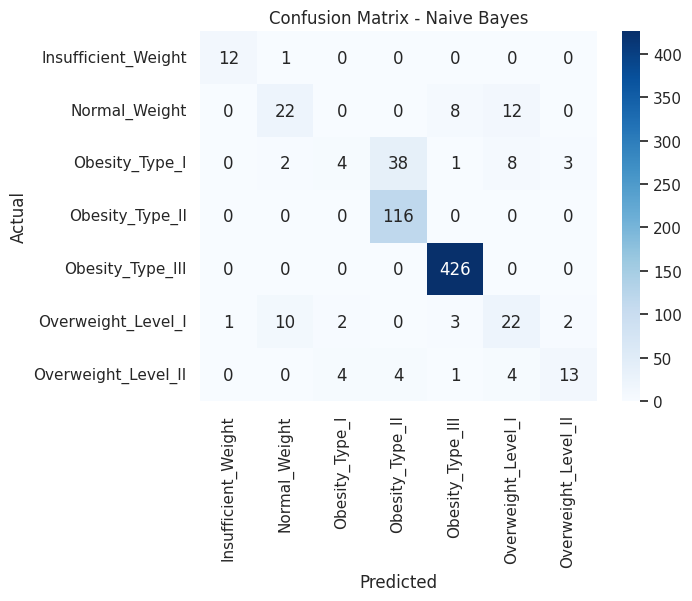

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [ ]:
joblib.dump(nb_clf, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

#ARTIFICIAL NEURAL NETWORK (ANN) MODEL TRAINING AND EVALUATION

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
180/180 - 10s - 57ms/step - accuracy: 0.7358 - loss: 0.7596 - val_accuracy: 0.8343 - val_loss: 0.4099
Epoch 2/50
180/180 - 1s - 8ms/step - accuracy: 0.8426 - loss: 0.4219 - val_accuracy: 0.8942 - val_loss: 0.2951
Epoch 3/50
180/180 - 1s - 4ms/step - accuracy: 0.8691 - loss: 0.3409 - val_accuracy: 0.9192 - val_loss: 0.2407
Epoch 4/50
180/180 - 1s - 3ms/step - accuracy: 0.8869 - loss: 0.2915 - val_accuracy: 0.9290 - val_loss: 0.2102
Epoch 5/50
180/180 - 0s - 2ms/step - accuracy: 0.8943 - loss: 0.2715 - val_accuracy: 0.9345 - val_loss: 0.1969
Epoch 6/50
180/180 - 1s - 3ms/step - accuracy: 0.8989 - loss: 0.2606 - val_accuracy: 0.9345 - val_loss: 0.1843
Epoch 7/50
180/180 - 1s - 4ms/step - accuracy: 0.9090 - loss: 0.2401 - val_accuracy: 0.9471 - val_loss: 0.1786
Epoch 8/50
180/180 - 1s - 3ms/step - accuracy: 0.9173 - loss: 0.2258 - val_accuracy: 0.9276 - val_loss: 0.1809
Epoch 9/50
180/180 - 1s - 3ms/step - accuracy: 0.9211 - loss: 0.2190 - val_accuracy: 0.9443 - val_loss: 0.1739

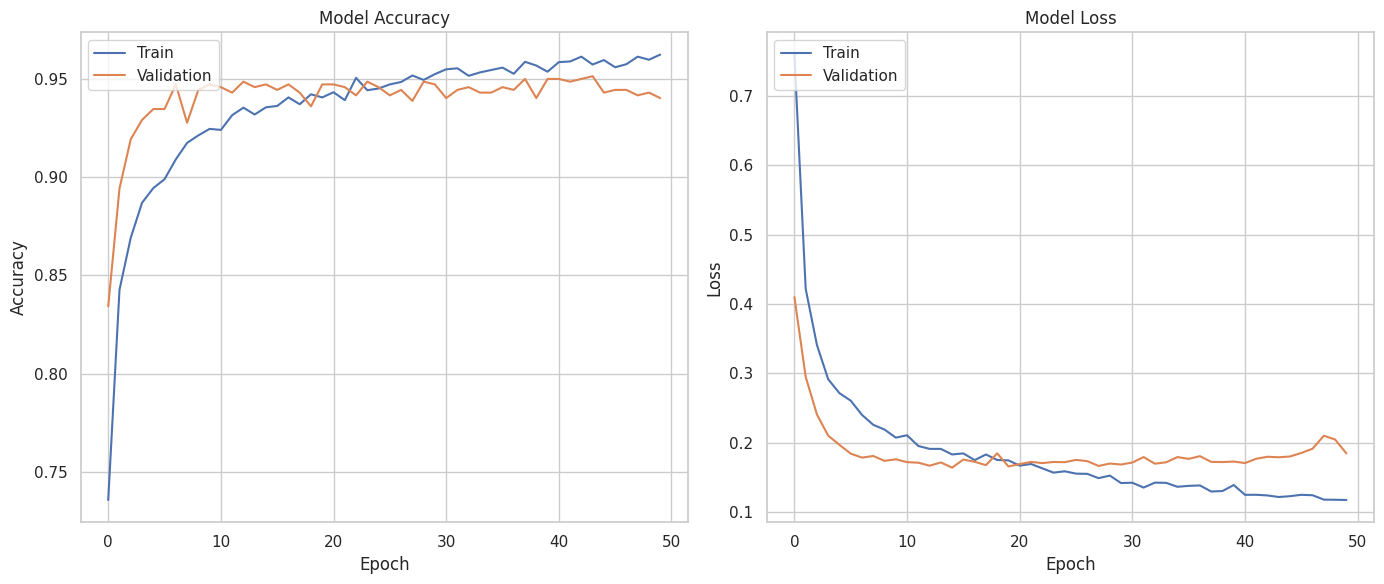

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.78      0.74      0.76        42
           2       0.86      0.79      0.82        56
           3       0.97      0.98      0.97       116
           4       1.00      1.00      1.00       426
           5       0.63      0.68      0.65        40
           6       0.75      0.58      0.65        26

    accuracy                           0.93       719
   macro avg       0.80      0.82      0.81       719
weighted avg       0.93      0.93      0.93       719


Accuracy Score: 0.9318497913769124


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann = Sequential()


ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.3))

ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.3))

ann.add(Dense(7, activation='softmax'))
ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = ann.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=2)

ann_eval = ann.evaluate(X_test, y_test)
print(f"ANN Test Loss: {ann_eval[0]}")
print(f"ANN Test Accuracy: {ann_eval[1]}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

y_pred_ann = ann.predict(X_test)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)

# Make predictions on the test set
y_pred = ann.predict(X_test)

# If using a neural network with keras or tensorflow, use this line to convert probabilities to classes
y_pred = (y_pred > 0.5).astype(int) if y_pred.shape[1] == 1 else y_pred.argmax(axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

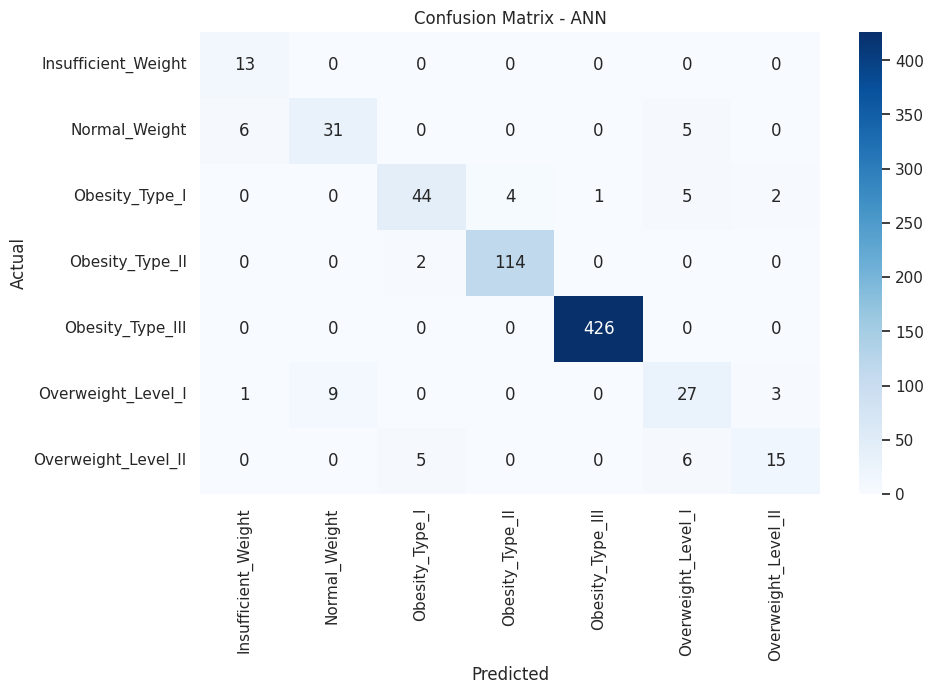

In [ ]:
plt.figure(figsize=(10, 6))
cm_ann = confusion_matrix(y_test, y_pred_ann_classes)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - ANN')
plt.show()


In [ ]:
## Hyper-parameter tuning

# Define a function to create the model
def create_ann_model(units1=128, units2=64, units3=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units3, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# Wrap the model in KerasClassifier without parameters
ann_keras = KerasClassifier(model=create_ann_model, verbose=0)

# Define parameter grid
param_dist = {
    'model__units1': [128, 64, 256],
    'model__units2': [64, 32, 128],
    'model__units3': [32, 16],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__learning_rate': [0.001, 0.01, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=ann_keras,
    param_distributions=param_dist,
    n_iter=10,          # Number of parameter settings sampled
    cv=3,               # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train, validation_data=(X_val, y_val))

# Evaluate the best model
best_model = random_search.best_estimator_.model_
ann_eval = best_model.evaluate(X_test, y_test)
print("Best Parameters (Randomized Search):", random_search.best_params_)
print(f"\nANN Test Loss: {ann_eval[0]}")
print(f"ANN Test Accuracy: {ann_eval[1]}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9411 - loss: 0.1358
Best Parameters (Randomized Search): {'model__units3': 16, 'model__units2': 64, 'model__units1': 256, 'model__learning_rate': 0.0001, 'model__dropout_rate': 0.2, 'epochs': 100, 'batch_size': 32}

ANN Test Loss: 0.15273219347000122
ANN Test Accuracy: 0.9429763555526733


In [ ]:
ann.save('/content/ann_model.h5')

#CONVOLUTIONAL NEURAL NETWORK (CNN) MODEL TRAINING AND EVALUATION

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
180/180 - 3s - 15ms/step - accuracy: 0.7422 - loss: 0.7585 - val_accuracy: 0.7925 - val_loss: 0.6428
Epoch 2/50
180/180 - 1s - 6ms/step - accuracy: 0.8550 - loss: 0.3768 - val_accuracy: 0.7786 - val_loss: 0.7770
Epoch 3/50
180/180 - 1s - 7ms/step - accuracy: 0.8804 - loss: 0.3075 - val_accuracy: 0.7772 - val_loss: 0.8180
Epoch 4/50
180/180 - 1s - 4ms/step - accuracy: 0.8947 - loss: 0.2752 - val_accuracy: 0.7688 - val_loss: 1.0552
Epoch 5/50
180/180 - 1s - 7ms/step - accuracy: 0.8982 - loss: 0.2593 - val_accuracy: 0.7702 - val_loss: 0.8739
Epoch 6/50
180/180 - 1s - 4ms/step - accuracy: 0.9095 - loss: 0.2443 - val_accuracy: 0.7730 - val_loss: 1.0410
Epoch 7/50
180/180 - 1s - 3ms/step - accuracy: 0.9156 - loss: 0.2264 - val_accuracy: 0.7632 - val_loss: 1.2026
Epoch 8/50
180/180 - 1s - 3ms/step - accuracy: 0.9199 - loss: 0.2172 - val_accuracy: 0.7604 - val_loss: 1.4156
Epoch 9/50
180/180 - 1s - 4ms/step - accuracy: 0.9215 - loss: 0.2108 - val_accuracy: 0.7772 - val_loss: 1.1759


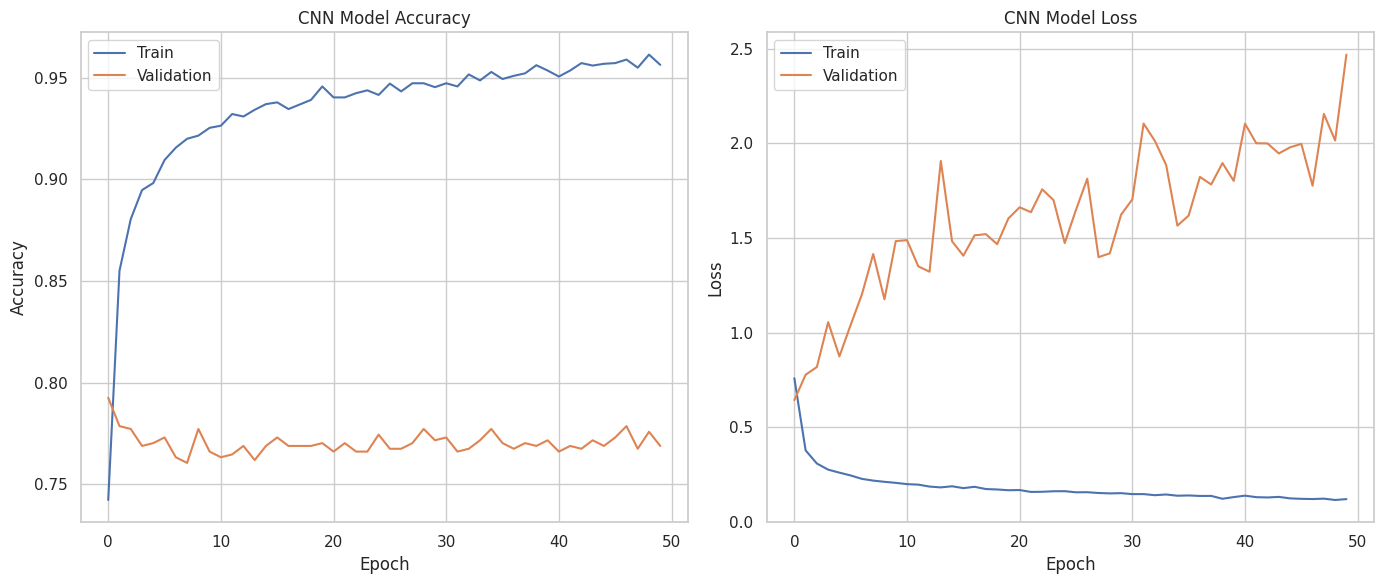

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.81      0.83      0.82        42
           2       0.87      0.84      0.85        56
           3       0.99      0.97      0.98       116
           4       1.00      1.00      1.00       426
           5       0.76      0.80      0.78        40
           6       0.81      0.81      0.81        26

    accuracy                           0.95       719
   macro avg       0.88      0.87      0.88       719
weighted avg       0.95      0.95      0.95       719



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import numpy as np

X_train_cnn = np.expand_dims(X_train, axis=2)
X_val_cnn = np.expand_dims(X_val, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(7, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cnn = cnn.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=50, batch_size=32, verbose=2)

cnn_eval = cnn.evaluate(X_test_cnn, y_test)
print(f"CNN Test Loss: {cnn_eval[0]}")
print(f"CNN Test Accuracy: {cnn_eval[1]}")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

y_pred_cnn = cnn.predict(X_test_cnn)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

print('CNN Classification Report:\n', classification_report(y_test, y_pred_cnn_classes))


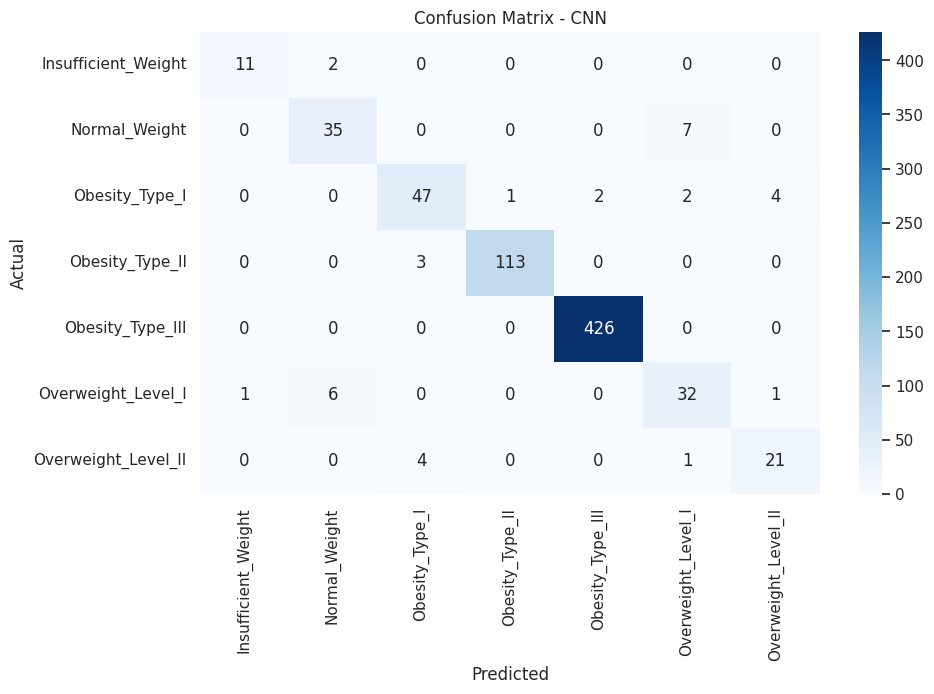

In [ ]:
plt.figure(figsize=(10, 6))
cm_cnn = confusion_matrix(y_test, y_pred_cnn_classes)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

In [ ]:
cnn.save('/content/cnn_model.h5')

# Recurrent Neural Network (RNN) TRAINING AND EVALUATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# X = X.values
X = X.reshape(X.shape[0], 1, X.shape[1])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

model = Sequential()  # Build the RNN model

model.add(SimpleRNN(units=100, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))  # Adding a Simple RNN layer

model.add(Dropout(0.2))   # Add Dropout to prevent overfitting

model.add(Dense(units=y_train.shape[1], activation='softmax'))  # Use softmax for multi-class classification  , Add a Dense output layer (for classification)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the RNN model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("\nAccuracy Score:", accuracy_score(y_test_classes, y_pred_classes))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5459 - loss: 1.2412 - val_accuracy: 0.8253 - val_loss: 0.4815
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.4760 - val_accuracy: 0.8678 - val_loss: 0.3607
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8568 - loss: 0.3952 - val_accuracy: 0.8852 - val_loss: 0.3060
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8859 - loss: 0.3111 - val_accuracy: 0.9033 - val_loss: 0.2704
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8911 - loss: 0.2990 - val_accuracy: 0.9095 - val_loss: 0.2444
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9078 - loss: 0.2645 - val_accuracy: 0.9228 - val_loss: 0.2232
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9079 - loss: 0.2527 - val_accuracy: 0.9248 - val_loss: 0.2059
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9145 - loss: 0.2345 - val_accuracy: 0.9311 - val_

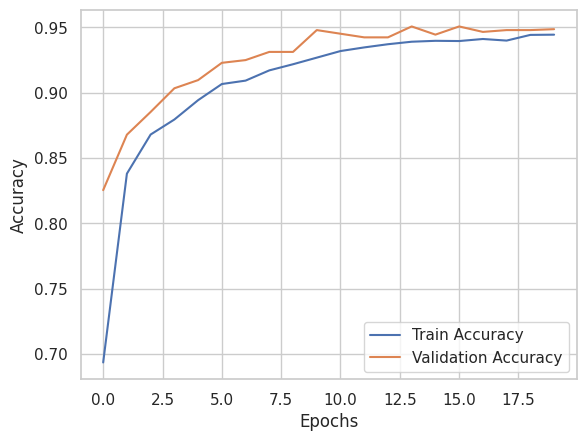

In [ ]:
# Plotting the training accuracy and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


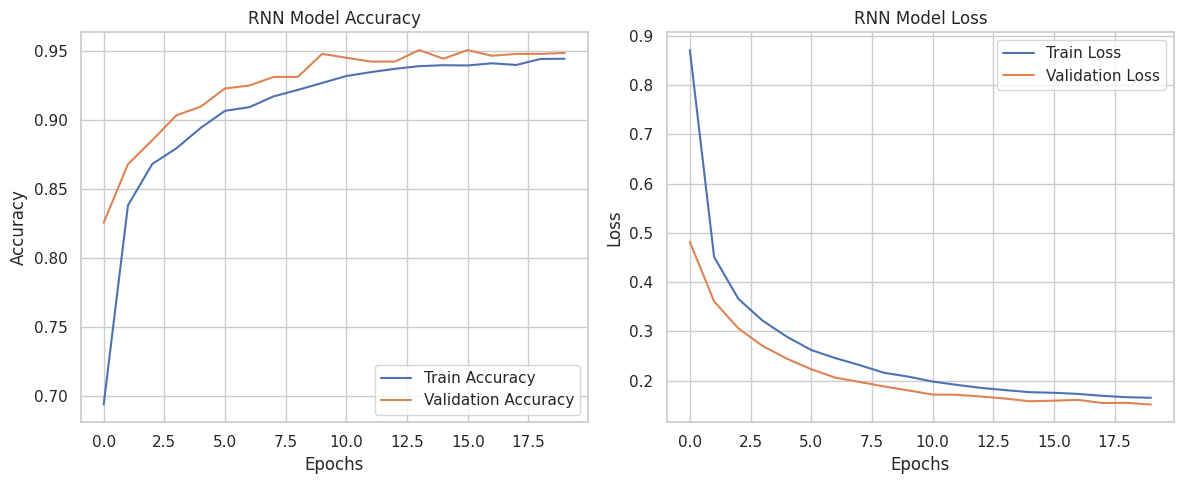

In [ ]:
# Plotting the training accuracy, validation accuracy, training loss, and validation loss
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('RNN Model Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RNN Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Deep Neural Network (DNN) TRAINING AND EVALUATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Reshape X_train and X_test to be 2D for the DNN
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Building the DNN model
model = Sequential()

# Input layer and hidden layers with dropout for regularization
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu')) # Input shape is now 2D
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer for multi-class classification
model.add(Dense(y_train.shape[1], activation='softmax'))  # Use softmax for multi-class classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# TrainING the DNN model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

print("\nAccuracy Score:", accuracy_score(y_test_classes, y_pred_classes))


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6395 - loss: 1.0439 - val_accuracy: 0.8274 - val_loss: 0.3983
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8255 - loss: 0.4648 - val_accuracy: 0.8949 - val_loss: 0.2826
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8589 - loss: 0.3570 - val_accuracy: 0.9151 - val_loss: 0.2229
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8761 - loss: 0.3176 - val_accuracy: 0.9228 - val_loss: 0.2041
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8820 - loss: 0.2858 - val_accuracy: 0.9311 - val_loss: 0.1960
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8965 - loss: 0.2605 - val_accuracy: 0.9367 - val_loss: 0.1843
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9034 - loss: 0.2538 - val_accuracy: 0.9318 - val_loss: 0.1794
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9067 - loss: 0.2478 - val_accuracy: 0.9311 - val_

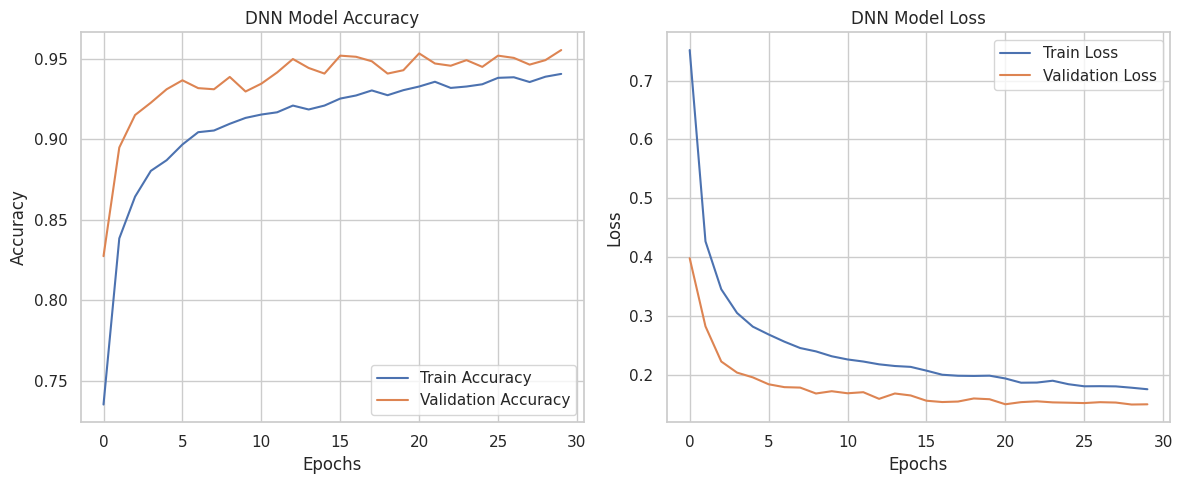

In [ ]:
# Plotting the training accuracy, validation accuracy, training loss, and validation loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('DNN Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('DNN Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Light GBM TRAINING AND EVALUATION

In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.9
}

# TrainING the LightGBM model
model = lgb.train(params,
                  train_data,
                  num_boost_round=100,
                  valid_sets=[test_data],
                  callbacks=[lgb.early_stopping(stopping_rounds=10)])

# Predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class with highest probability

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_classes))



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1994
[LightGBM] [Info] Number of data points in the train set: 5745, number of used features: 9
[LightGBM] [Info] Start training from score -3.700258
[LightGBM] [Info] Start training from score -2.795299
[LightGBM] [Info] Start training from score -2.576152
[LightGBM] [Info] Start training from score -1.724613
[LightGBM] [Info] Start training from score -0.581436
[LightGBM] [Info] Start training from score -2.786788
[LightGBM] [Info] Start training from score -3.239985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[39]	valid_0's

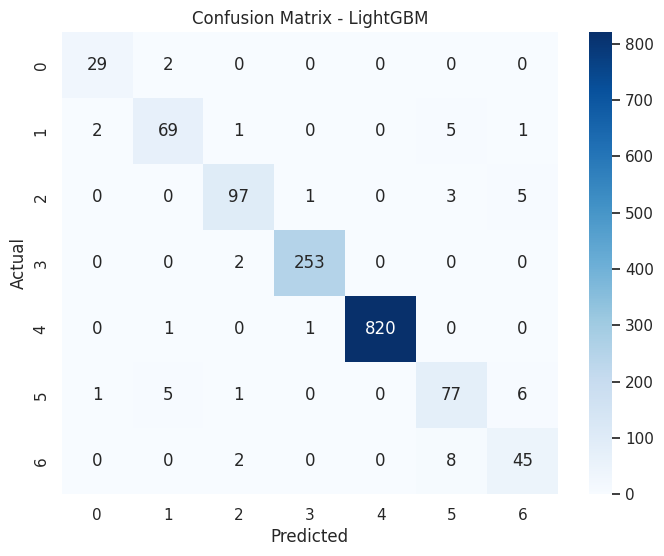

In [ ]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

In [ ]:
# Feature Importance
lgb.plot_importance(model, max_num_features=15, importance_type='gain', figsize=(10, 8))
plt.title('Feature Importances - LightGBM')
plt.show()

In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape if necessary
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Encode the target variable if it's categorical
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Define the parameter grid for LightGBM
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 50],
    'min_data_in_leaf': [20, 50, 100],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [0, 5, 10]
}

# Set up the LightGBM model
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=len(np.unique(y)), metric='multi_logloss')

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
